## Input data

In [3]:

import ov_detect
import pandas as pd
import numpy as np
import os
import math
import scipy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import boto3
import json
import boto3.session
# https://boto3.amazonaws.com/v1/documentation/api/latest/guide/dynamodb.html#querying-and-scanning
from boto3.dynamodb.conditions import GreaterThan, Key, Attr
import dynamo_pandas
from dynamo_pandas import get_df, keys, put_df
import datetime
from datetime import timedelta
import seaborn as sns

##connect dynamo db
path = "C:/Users/KatherineRidley/Mint Diagnostics Ltd/Hormone Data Analysis - General/Notebooks/MNC/"
get = ov_detect.get_data(path)
dynamodb = get.connect_dynamodb(region = 'eu-west-2', profile = 'default')
#define tables
table_athlete = dynamodb.Table('Athlete-qx7lirnxjfdzxoss6cmomxzgpe-staging')
table_sample = dynamodb.Table('Sample-qx7lirnxjfdzxoss6cmomxzgpe-staging')
table_measurement = dynamodb.Table('Measurement-qx7lirnxjfdzxoss6cmomxzgpe-staging')
table_study = dynamodb.Table('Study-qx7lirnxjfdzxoss6cmomxzgpe-staging')
table_testbatchcode = dynamodb.Table('TestBatchCode-qx7lirnxjfdzxoss6cmomxzgpe-staging')
table_answer = dynamodb.Table('Answer-qx7lirnxjfdzxoss6cmomxzgpe-staging')
table_organisation = dynamodb.Table('Organisation-qx7lirnxjfdzxoss6cmomxzgpe-staging')



listofdfs = []

org_df_meta=dynamo_pandas.get_df(table='Organisation-qx7lirnxjfdzxoss6cmomxzgpe-staging')
print('Please input organisation name from this list: ')    
print(org_df_meta.name)
org_code_gcr=get.get_org_from_dynamo('Organisation-qx7lirnxjfdzxoss6cmomxzgpe-staging')
org_code=org_code_gcr[:-4]
print('...')
inTitles = False
while inTitles == False:
    print('Do you want to choose a programme from this organisation? (y/n)')
    prog_yn = input('Do you want to choose a programme? (y/n): ')
    if (prog_yn == 'y') | (prog_yn == 'Y'):
        inTitles=True
        prog_id= get.get_prog_from_org(org_code_gcr)
        print('...')
        par_id= get.get_participants_from_study(prog_id, org_code_gcr)
        #batch_yn = input('Do you want to generate a batch report for all particpants in this programme? (y/n): ')
    elif (prog_yn == 'n') | (prog_yn == 'N'):
        par_id =get.get_participants_from_org(org_code_gcr)
        inTitles =True

for par in par_id:
    estradiol_tbc_id,progesterone_tbc_id = get.get_test_batch_codes('TestBatchCode-qx7lirnxjfdzxoss6cmomxzgpe-staging')
    
    kitlist=get.getallkitnums(par)
    if len(kitlist)>0:
        
        for kitnum in kitlist:
        
            samples_df=get.get_samples(par, kitnum)
           # print(samples_df)
            #export_path=make_dirs(org_code_gcr, kitnum, par, directory)
            e_df, p_df = get.get_e_df_and_p_df(kitnum, par, estradiol_tbc_id,progesterone_tbc_id)
           
            answers_df=get.get_answers(par, kitnum)
            #ep_chart=get_figure(answers_df, e_df, p_df)

            df = aws_data_merge(par, kitnum, e_df, p_df, answers_df)

            
                

            df = df.sort_values(by='collectedDate')
            listofdfs.append(df)

fulldf=pd.concat(listofdfs)

fulldf.to_csv('fulldf_{}.csv'.format(org_code))
print(fulldf)


#data = pd.read_csv("C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/KR_MNC_CYCLES.csv")

TypeError: getdata.connect_dynamodb() missing 1 required positional argument: 'self'

In [1]:
## MAN CITY OVULATION

import ov_detect
import pandas as pd
import numpy as np
import os
import math
import scipy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import boto3
import json
import boto3.session
# https://boto3.amazonaws.com/v1/documentation/api/latest/guide/dynamodb.html#querying-and-scanning
from boto3.dynamodb.conditions import GreaterThan, Key, Attr
import dynamo_pandas
from dynamo_pandas import get_df, keys, put_df
import datetime
from datetime import timedelta
import seaborn as sns


data = pd.read_csv("C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/KR_MNC_CYCLES.csv")

#print(data.head())



for i in data['Player'].unique():

    for j in data['Cycle '].unique():

        indata = data[(data['Player'] == i) & (data['Cycle '] == j)]

        



        if len(indata) >0:

            

            #print(data.loc[(data['Player'] == i) & (data['Cycle '] == j), 'Date'])

            

             

data = data.fillna(0)


data1perweek = data[data['Every 7th day']==1]
dataeveryother = data[data['Every other day']==1]
dataevery3rd = data[data['Every 3rd day']==1]
datetwiceaweek = data[data['Twice a week']==1]

data1perweek.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/MNC_1perweek.csv')
dataeveryother.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/MNC_everyother.csv')
dataevery3rd.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/MNC_every3rd.csv')
datetwiceaweek.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/MNC_twiceaweek.csv')
data.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/full.csv')



            

           #print(d['d'].loc[(d['d']['Player'] == i) & (d['d']['Cycle '] == j), 'E2_difference'])


#print(data)

##kassam 

##save all data to csv

def replace_with_NaN(df, col):
    df2 = df.copy()
    columns = ['E2', 'P4', 'E2_difference', 'P4_difference']
    for column in columns:
        
        df2[column] = np.where(df2[col] != 1, np.nan, df2[column])
    return df2

#print(data)

cols = ['Every 7th day', 'Every other day', 'Every 3rd day', 'Twice a week']

every3rdfull = replace_with_NaN(data, 'Every 3rd day')
everyotherfull = replace_with_NaN(data, 'Every other day')
twiceaweekfull = replace_with_NaN(data, 'Twice a week')
oneperweekfull = replace_with_NaN(data, 'Every 7th day')




cols = ['Every 7th day', 'Every other day', 'Every 3rd day', 'Twice a week']

every3rdfull = replace_with_NaN(data, 'Every 3rd day')
everyotherfull = replace_with_NaN(data, 'Every other day')
twiceaweekfull = replace_with_NaN(data, 'Twice a week')
oneperweekfull = replace_with_NaN(data, 'Every 7th day')


 
dataall = {'d': data, 'baseline': 5, 'kassam':1, 'baird':5, 'name': 'All'}
everyother = {'d': everyotherfull, 'baseline': 3, 'kassam':2, 'baird':3, 'name': 'Every other day'}
every3rd = {'d': every3rdfull, 'baseline': 1, 'kassam':1, 'baird':3, 'name': 'Every 3rd day'}
twiceaweek = {'d': twiceaweekfull, 'baseline': 1, 'kassam':1, 'baird':3, 'name': 'Twice a week'}
oneperweek = {'d': oneperweekfull, 'baseline': 1, 'kassam':1, 'baird':2, 'name': 'Every 7th day'}



for d in [dataall, every3rd, oneperweek]:
    dt = d['d']
    base = d['baseline']

    for i in dt['Player'].unique():
        for j in dt['Cycle '].unique():
            baseline(dt, i, j, 'E2', base)
            baseline(dt, i, j, 'P4', base)


    idxlist = []
    dt = d['d']
    kass = d['kassam']
    print(d['name'])
    #print(idxlist)
    #print(dt.index.to_list())
    for i in dt['Player'].unique():
        for j in dt['Cycle '].unique():
            print(i, j)
            idxlist.append(kassam(dt, i, j, kass))

    idxlist = [idx for idx in idxlist if (idx != None) & (idx != -6) & (idx != -2) & (idx != -4) & (idx != -1)]
    print(idxlist)
    dt.loc[idxlist, 'Kassam'] = 1
    dt['Kassam'] = dt['Kassam'].fillna(0)
    





for d in [dataall, everyother, every3rd, twiceaweek, oneperweek]:
    idxlist = []
    dt = d['d']
    idxlist = []
    print(d['name'])
    for i in dt['Player'].unique():
        for j in dt['Cycle '].unique():

            #print(i, j)
            
            idxlist.append(baird(dt, i, j, d['baird']))

    idxlist = [idx for idx in idxlist if (idx != None) & (idx != -6)]
    print(idxlist)
    dt.loc[idxlist, 'Baird'] = 1
    dt['Baird'] = dt['Baird'].fillna(0)


datadict ={'every3rd':every3rd['d'], 'everyother':everyother['d'], 'oneperweek':oneperweek['d'], 'full':dataall['d']}

#print(every3rd['d'].tail(20))
#print(every3rd['d']['P4_difference'].tail(20))






datadict ={'every 3rd day':every3rd['d'], 'one per week':oneperweek['d'], 'full':dataall['d']}

'''for k, v in datadict.items():
        for p in v.Player.unique():
             for c in v['Cycle '].unique():
                value = v.loc[(v['Player']==p) & (v['Cycle ']==c)]
                if len(value) > 5:
                    #value = value.set_index('Day')
                    #value = value[['P4', 'E2', 'Menses']]
                    value = value.replace(0, np.nan)
                    values = value.dropna(subset=['P4', 'E2'])
                    #print(value)
                    #value= value.interpolate(method='linear', limit_direction='forward', axis=0)

                    fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex = True, figsize=(10,5))
                    ax2 = ax1.twinx()
                    
                    values.reset_index().plot(ax = ax1, x='Day', y='P4', color = 'palegreen', linewidth=6, label='Progesterone Average')
                    values.reset_index().plot(ax = ax1, x='Day', y='P4', color = 'limegreen', marker = 'o', markersize = 6, linestyle = 'none', label = 'Progesterone')
                    values.reset_index().plot(ax = ax2, x='Day', y='E2', color = '#FFC8D3', linewidth=6, label='Oestradiol Average')
                    values.reset_index().plot(ax = ax2, x='Day', y='E2', color = '#DB2525', marker = 'o', markersize = 6, linestyle = 'none', label = 'Oestradiol')
                    ylow, yhigh = ax1.get_ylim()
                    xlow, xhigh = ax1.get_xlim()
                    for i in range(len(value.loc[value['Menses']==1])):
                        if i == 0:
                                
                            ax1.text(xlow+((xhigh-xlow)/20)
                            , yhigh-((yhigh-ylow)/20), 
                            'Menses', color = '#AA0E24', fontsize = 14, fontstyle = 'normal', fontweight = 'bold', horizontalalignment='left')

                                    
                        ax1.axvline(value.loc[value['Menses']==1, 'Day'].iloc[i], linestyle = 'None',color='crimson', marker = 'o',  markersize = 14)

                    ax1.set_xlim(0, 30)
                    ax1.axvline(value.loc[value['Ovulation - countback']==1, 'Day'].iloc[0], linestyle = '-',color='blue', marker = 'o',  markersize = 15)
                    if len(value.loc[value['Kassam']==1])>0:
                        ax1.axvspan(value.loc[value['Kassam']==1, 'Day'].iloc[0]-1, value.loc[value['Kassam']==1, 'Day'].iloc[0]+1, color='violet', alpha=0.2)
                        ax1.axvline(value.loc[value['Kassam']==1, 'Day'].iloc[0], linestyle = '--',color='violet', marker = 'None', alpha=0.5)
                    #if len(value.loc[value['Kassam+4']==1])>0:
                       # ax1.axvspan(value.loc[value['Kassam+4']==1, 'Day'].iloc[0], value.loc[value['Kassam+4']==1, 'Day'].max() , alpha=0.2, color='violet')
                    if len(value.loc[value['Baird']==1])>0:
                        ax1.axvspan(value.loc[value['Baird']==1, 'Day'].iloc[0]-1, value.loc[value['Baird']==1, 'Day'].iloc[0]+1, color='orange', alpha=0.2)
                        ax1.axvline(value.loc[value['Baird']==1, 'Day'].iloc[0], linestyle = '--',color='orange', marker = 'None', alpha=0.5)
                    #if len(value.loc[value['Bairdrange']==1])>0:
                        #ax1.axvspan(value.loc[value['Bairdrange']==1, 'Day'].iloc[0], value.loc[value['Bairdrange']==1, 'Day'].max() , alpha=0.2, color='orange')

                    #ax1.axvline(1, linestyle = '--',color='gray', marker = 'None')
                    ax1.axvspan(1, 5, alpha=0.2, color='gray')
                    #ax1.axvline(5, linestyle = '--',color='gray', marker = 'None')

                    
                    

                            # Set limits

                    #ax1.set_xlim(value.reset_index()['Day'].min() -2, value.reset_index()['Day'].max() + 2)

                    # ax1.set_ylim(0, e_df['edata'].max() + 0.5)


                    plt.legend('', frameon=False)
                    ax1.legend('', frameon=False)

                    ax2.set_ylabel('Oestradiol, pg/mL', color = '#DB2525', fontsize = 16)
                    ax1.set_ylabel('Progesterone, pg/mL', color = 'limegreen', fontsize = 16)
                    ax1.set_xlabel('Cycle day', fontsize = 16)
                    plt.title('Player '+str(p) +', Cycle '+str(c)+ ', Frequency '+str(k), fontsize = 18)
                    
                    
                    # plt.grid(True, axis = 'x' )
                    #ax1.grid(True, which = 'both', axis = 'x', color='#DDDDDD', linestyle='--', linewidth=1 )
                    plt.savefig('{}_{}_{}.png'.format(p, c, k), format='png', dpi=1200, bbox_inches='tight', facecolor='w', transparent=False)
                    plt.show()'''


IndentationError: expected an indented block after 'if' statement on line 39 (1904414282.py, line 49)

Please input organisation name from this list: 
0                         HRA Ltd
1                             PAL
2                     Juventus FC
3             Hormonix Onboarding
4                 Manchester City
5                   Mint Internal
6             Hartpury University
7          Test Organisation Name
8                         Boxford
9                      Venezia FC
10    English Institute of Sports
11           Testing Organisation
12                         AEK FC
13                            RDR
14                    Optima-life
15             Army Health Branch
16                     LboroSSEHS
17            RGBH Uni Portsmouth
18                         Jennis
19                       Test Org
20                   FC Barcelona
Name: name, dtype: object
Organisation Name: Jennis
Organisation code: JEN
...
Do you want to choose a programme from this organisation? (y/n)
This organisation has 35 participants
Please input participant name from this list | or type AL

C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '16/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '22/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '24/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-20', '2021-02-21',
               ...
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30'],
              dtype='datetime64[ns]', name='collectedDate', length=292, freq='D') DatetimeIndex(['2021-11-14', '2021-11-15', '2021-11-16', '2021-11-17',
               '2021-11-18', '2021-11-19', '2021-11-20', '2021-11-21',
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29',
               '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
               '2021-12-04', '2021-12-05', '2021-12-06'],
              dtype='datetime64[ns]', name='collectedDate', freq=

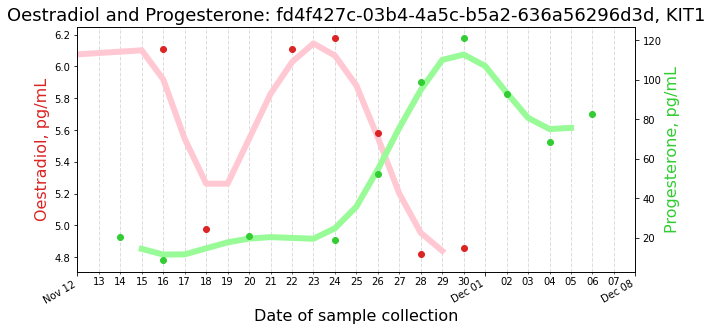

Number of samples retrieved: 14
Number of estradiol measurements retrieved: 10
2022-03-14 00:00:00 2022-12-03 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '21/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17',
               '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21',
               '2022-03-22', '2022-03-23',
               ...
               '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27',
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-03'],
              dtype='datetime64[ns]', name='collectedDate', length=265, freq='D') DatetimeIndex(['2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07',
               '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11',
               '2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15',
               '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-19',
               '2022-03-20', '2022-03-21', '2022-03-22', '2022-03-23',
               '2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27',
               '2022-03-28'],
              dtype='d

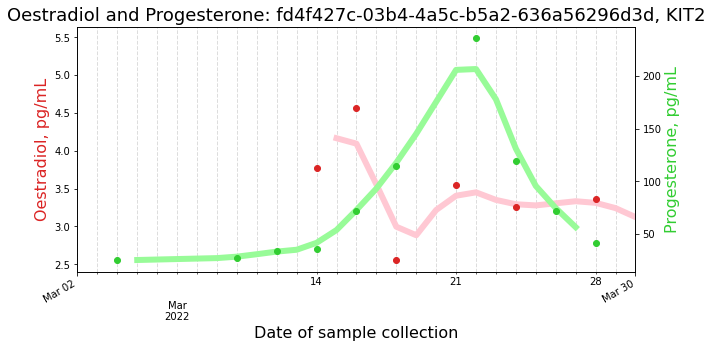

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['1', '2']
Number of samples retrieved: 13
Number of estradiol measurements retrieved: 10
2021-04-11 00:00:00 2021-12-11 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '14/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '16/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '20/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-04-11', '2021-04-12', '2021-04-13', '2021-04-14',
               '2021-04-15', '2021-04-16', '2021-04-17', '2021-04-18',
               '2021-04-19', '2021-04-20',
               ...
               '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05',
               '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09',
               '2021-12-10', '2021-12-11'],
              dtype='datetime64[ns]', name='collectedDate', length=245, freq='D') DatetimeIndex(['2021-11-06', '2021-11-07', '2021-11-08', '2021-11-09',
               '2021-11-10', '2021-11-11', '2021-11-12', '2021-11-13',
               '2021-11-14', '2021-11-15', '2021-11-16', '2021-11-17',
               '2021-11-18', '2021-11-19', '2021-11-20', '2021-11-21',
               '2021-11-22', '2021-11-23', '2021-11-24'],
              dtype='datetime64[ns]', name='collectedDate', freq='D')
No answers data found
No bleeding recorded for this participant


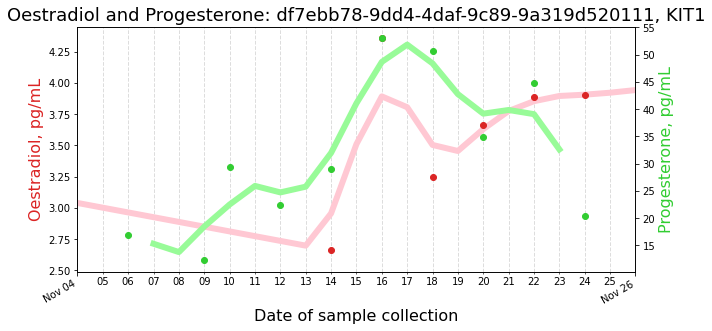

Number of samples retrieved: 14
Number of estradiol measurements retrieved: 10
2022-02-04 00:00:00 2022-10-03 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '14/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '19/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07',
               '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11',
               '2022-02-12', '2022-02-13',
               ...
               '2022-09-24', '2022-09-25', '2022-09-26', '2022-09-27',
               '2022-09-28', '2022-09-29', '2022-09-30', '2022-10-01',
               '2022-10-02', '2022-10-03'],
              dtype='datetime64[ns]', name='collectedDate', length=242, freq='D') DatetimeIndex(['2022-03-10', '2022-03-11', '2022-03-12', '2022-03-13',
               '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17',
               '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21',
               '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29',
               '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-02'],
              dtype='datetime64[ns]', name='collect

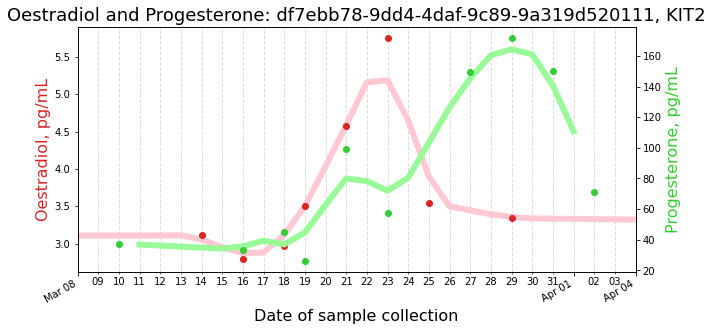

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
No hormone measurements found for this participant
['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['1', '2']
Number of samples retrieved: 15
Number of estradiol measurements retrieved: 10
2021-01-11 00:00:00 2021-11-26 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '13/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '15/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '21/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-01-11', '2021-01-12', '2021-01-13', '2021-01-14',
               '2021-01-15', '2021-01-16', '2021-01-17', '2021-01-18',
               '2021-01-19', '2021-01-20',
               ...
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20',
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26'],
              dtype='datetime64[ns]', name='collectedDate', length=320, freq='D') DatetimeIndex(['2021-11-01', '2021-11-02', '2021-11-03', '2021-11-04',
               '2021-11-05', '2021-11-06', '2021-11-07', '2021-11-08',
               '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
               '2021-11-13', '2021-11-14', '2021-11-15', '2021-11-16',
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20',
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26'],
        

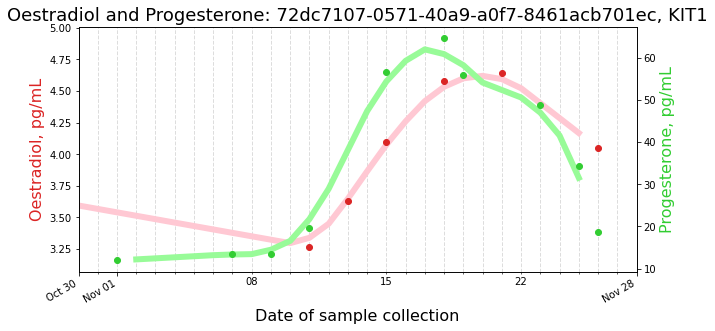

Number of samples retrieved: 15
Number of estradiol measurements retrieved: 10
2022-02-03 00:00:00 2022-11-03 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '19/02/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '25/02/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '26/02/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '28/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-02-03', '2022-02-04', '2022-02-05', '2022-02-06',
               '2022-02-07', '2022-02-08', '2022-02-09', '2022-02-10',
               '2022-02-11', '2022-02-12',
               ...
               '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28',
               '2022-10-29', '2022-10-30', '2022-10-31', '2022-11-01',
               '2022-11-02', '2022-11-03'],
              dtype='datetime64[ns]', name='collectedDate', length=274, freq='D') DatetimeIndex(['2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22',
               '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26',
               '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02',
               '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06',
               '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10',
               '2022-03-11', '2022-03-12', '2022-03-13', '2022-03-14'],
              dtype='datetime64[ns]', name='collect

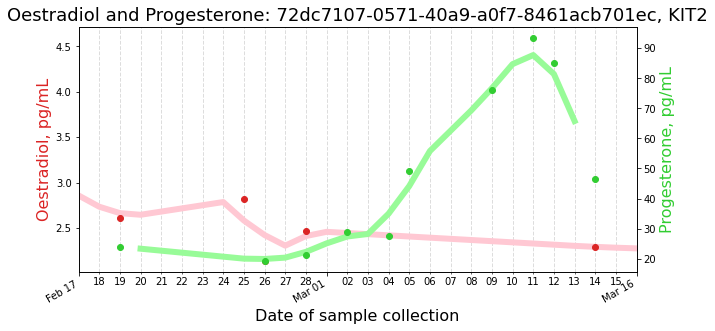

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['1', '2']
Number of samples retrieved: 13
Number of estradiol measurements retrieved: 10
2021-05-11 00:00:00 2021-11-27 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '13/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '15/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '17/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '19/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14',
               '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20',
               ...
               '2021-11-18', '2021-11-19', '2021-11-20', '2021-11-21',
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-27'],
              dtype='datetime64[ns]', name='collectedDate', length=201, freq='D') DatetimeIndex(['2021-11-05', '2021-11-06', '2021-11-07', '2021-11-08',
               '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
               '2021-11-13', '2021-11-14', '2021-11-15', '2021-11-16',
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20',
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27'],
              dtype='datetime64[ns]', name='collectedDate', freq=

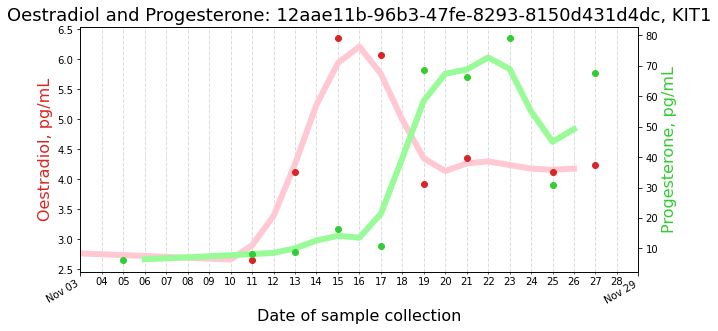

Number of samples retrieved: 12
Number of estradiol measurements retrieved: 10
2022-02-23 00:00:00 2022-11-03 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '23/02/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '13/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '17/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26',
               '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02',
               '2022-03-03', '2022-03-04',
               ...
               '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28',
               '2022-10-29', '2022-10-30', '2022-10-31', '2022-11-01',
               '2022-11-02', '2022-11-03'],
              dtype='datetime64[ns]', name='collectedDate', length=254, freq='D') DatetimeIndex(['2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26',
               '2022-02-27', '2022-02-28', '2022-03-01', '2022-03-02',
               '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06',
               '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10',
               '2022-03-11', '2022-03-12', '2022-03-13', '2022-03-14',
               '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18',
               '2022-03-19', '2022-03-20'],
        

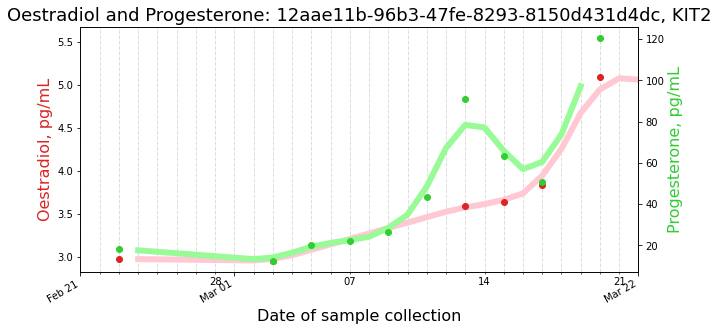

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['1', '2']
Number of samples retrieved: 13
Number of estradiol measurements retrieved: 10
2021-01-12 00:00:00 2021-12-22 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '22/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '13/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '15/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '17/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21',
               ...
               '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
               '2021-12-17', '2021-12-18', '2021-12-19', '2021-12-20',
               '2021-12-21', '2021-12-22'],
              dtype='datetime64[ns]', name='collectedDate', length=345, freq='D') DatetimeIndex(['2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29',
               '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
               '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11',
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17', '2021-12-

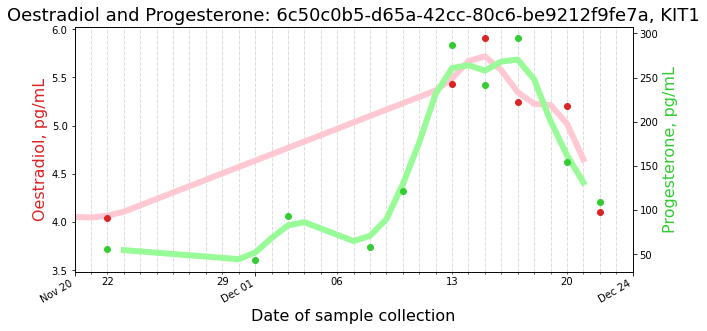

Number of samples retrieved: 14
Number of estradiol measurements retrieved: 10
2022-02-04 00:00:00 2022-12-03 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '23/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07',
               '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11',
               '2022-02-12', '2022-02-13',
               ...
               '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27',
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-03'],
              dtype='datetime64[ns]', name='collectedDate', length=303, freq='D') DatetimeIndex(['2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10',
               '2022-03-11', '2022-03-12', '2022-03-13', '2022-03-14',
               '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18',
               '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26',
               '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30',
               '2022-03-31', '2022-04-01', '2022-04-

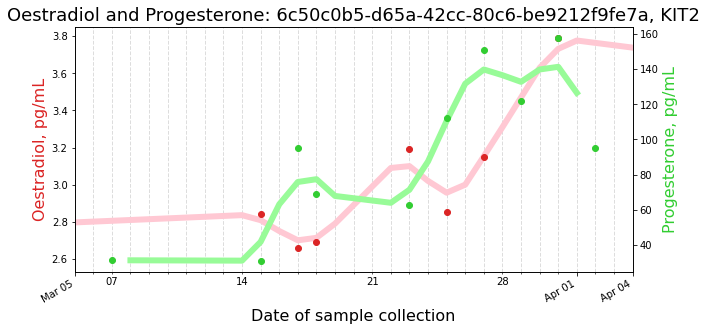

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['1', '2']
Number of samples retrieved: 16
Number of estradiol measurements retrieved: 10
2021-02-12 00:00:00 2021-12-16 00:00:00
Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-20', '2021-02-21',
               ...
               '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
               '2021-12-11', '2021-12-12', '2021-12-13', '2021-12-14',
               '2021-12-15', '2021-12-16'],
              dtype='datetime64[ns]', name='collectedDate', length=308, freq='D') DatetimeIndex(['2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '20

C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '21/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '26/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '28/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '30/

No answers data found
No bleeding recorded for this participant


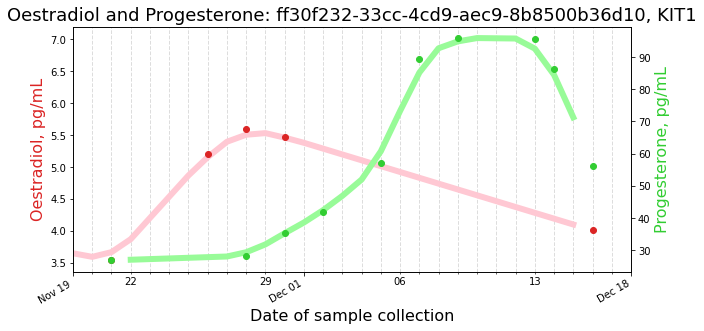

Number of samples retrieved: 15
Number of estradiol measurements retrieved: 10
2022-02-05 00:00:00 2022-10-05 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '14/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '21/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '28/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12',
               '2022-02-13', '2022-02-14',
               ...
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01', '2022-10-02', '2022-10-03',
               '2022-10-04', '2022-10-05'],
              dtype='datetime64[ns]', name='collectedDate', length=243, freq='D') DatetimeIndex(['2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17',
               '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21',
               '2022-04-22', '2022-04-23', '2022-04-24', '2022-04-25',
               '2022-04-26', '2022-04-27', '2022-04-28', '2022-04-29',
               '2022-04-30', '2022-05-01', '2022-05-02', '2022-05-03',
               '2022-05-04', '2022-05-05', '2022-05-06', '2022-05-07',
               '2022-05-08', '2022-05-09', '2022-05-

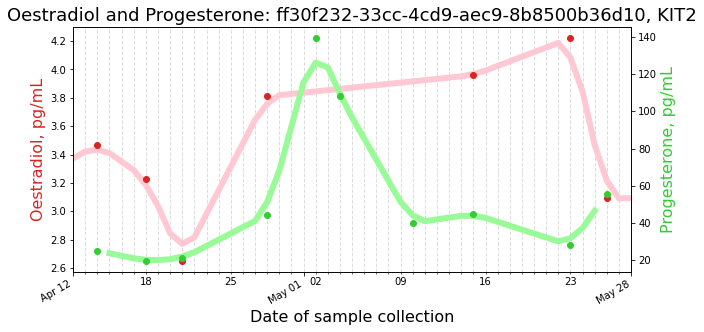

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
No hormone measurements found for this participant
['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['1', '2', '3']
Number of samples retrieved: 18
Number of estradiol measurements retrieved: 18
2021-01-12 00:00:00 2021-11-29 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '13/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '15/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '17/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '19/

Number of progesterone measurements retrieved: 18
DatetimeIndex(['2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21',
               ...
               '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27',
               '2021-11-28', '2021-11-29'],
              dtype='datetime64[ns]', name='collectedDate', length=322, freq='D') DatetimeIndex(['2021-11-05', '2021-11-06', '2021-11-07', '2021-11-08',
               '2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
               '2021-11-13', '2021-11-14', '2021-11-15', '2021-11-16',
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20',
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30', '2021-12-

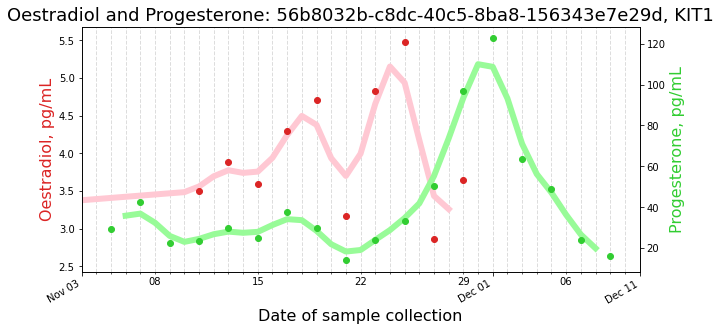

Number of samples retrieved: 16
Number of estradiol measurements retrieved: 9
2022-01-04 00:00:00 2022-11-04 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '22/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '30/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '17/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))


Number of progesterone measurements retrieved: 8
DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29',
               '2022-10-30', '2022-10-31', '2022-11-01', '2022-11-02',
               '2022-11-03', '2022-11-04'],
              dtype='datetime64[ns]', name='collectedDate', length=305, freq='D') DatetimeIndex(['2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29',
               '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-02',
               '2022-04-03', '2022-04-04', '2022-04-05', '2022-04-06',
               '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10',
               '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14',
               '2022-04-15', '2022-04-16', '2022-04-1

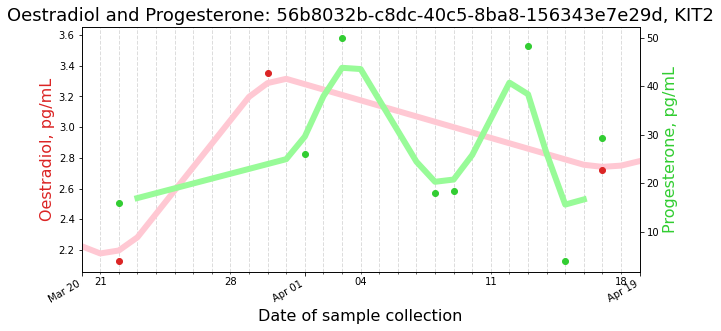

Number of samples retrieved: 8
Number of estradiol measurements retrieved: 1
2022-04-23 00:00:00 2022-04-23 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '23/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))


Number of progesterone measurements retrieved: 2
DatetimeIndex(['2022-04-23'], dtype='datetime64[ns]', name='collectedDate', freq='D') DatetimeIndex(['2022-04-21', '2022-04-22', '2022-04-23'], dtype='datetime64[ns]', name='collectedDate', freq='D')
No answers data found
No bleeding recorded for this participant


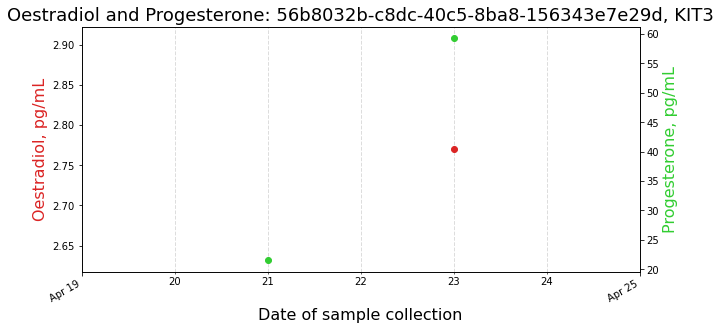

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
No hormone measurements found for this participant
['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['1', '2']
Number of samples retrieved: 15
Number of estradiol measurements retrieved: 10
2021-01-12 00:00:00 2021-12-15 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '22/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '26/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '29/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '13/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21',
               ...
               '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09',
               '2021-12-10', '2021-12-11', '2021-12-12', '2021-12-13',
               '2021-12-14', '2021-12-15'],
              dtype='datetime64[ns]', name='collectedDate', length=338, freq='D') DatetimeIndex(['2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29',
               '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
               '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11',
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15'],
              dtype='datetime64[ns]', name='collect

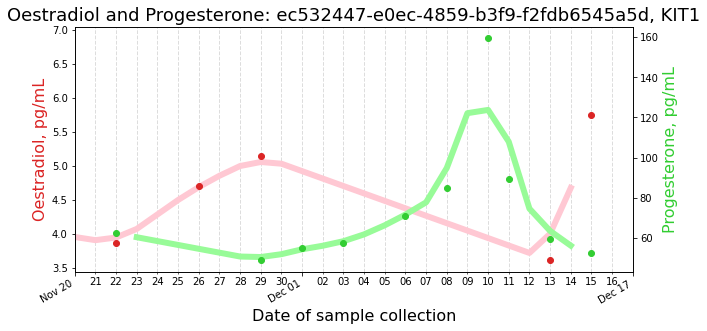

Number of samples retrieved: 11
Number of estradiol measurements retrieved: 10
2022-01-04 00:00:00 2022-03-30 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '13/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '19/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13', '2022-01-14', '2022-01-15',
               '2022-01-16', '2022-01-17', '2022-01-18', '2022-01-19',
               '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-29', '2022-01-30', '2022-01-31',
               '2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12',
               '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25'

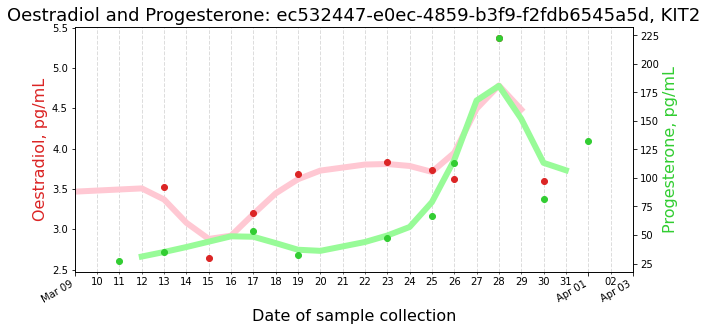

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['2', '1']
Number of samples retrieved: 16
Number of estradiol measurements retrieved: 10
2022-01-04 00:00:00 2022-10-04 00:00:00
Number of progesterone measurements retrieved: 10


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '23/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '27/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '29/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '16/

DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2022-09-25', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30', '2022-10-01', '2022-10-02',
               '2022-10-03', '2022-10-04'],
              dtype='datetime64[ns]', name='collectedDate', length=274, freq='D') DatetimeIndex(['2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26',
               '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30',
               '2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03',
               '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07',
               '2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11',
               '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15',
               '2022-04-16'],
              dtype='datetime64[ns]', name='collectedDate', freq='D')
No

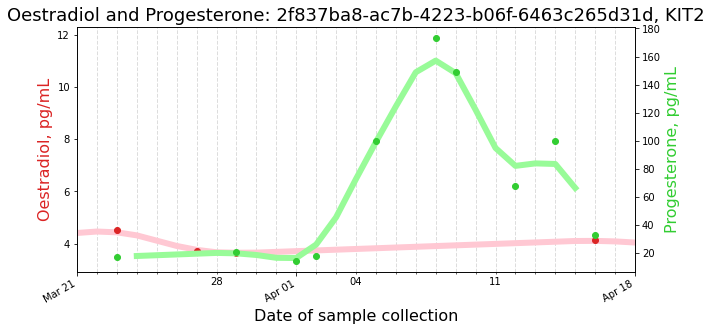

Number of samples retrieved: 15
Number of estradiol measurements retrieved: 10
2021-02-12 00:00:00 2021-12-18 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '23/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '28/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '30/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '14/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-20', '2021-02-21',
               ...
               '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12',
               '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
               '2021-12-17', '2021-12-18'],
              dtype='datetime64[ns]', name='collectedDate', length=310, freq='D') DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-27', '2021-11-28', '2021-11-29', '2021-11-30',
               '2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04',
               '2021-12-05', '2021-12-06', '2021-12-07', '2021-12-08',
               '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12',
               '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
               '2021-12-17', '2021-12-18'],
        

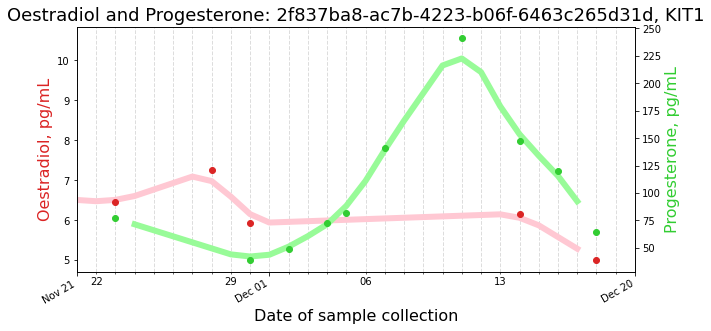

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
No hormone measurements found for this participant
['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['1', '2']
Number of samples retrieved: 16
Number of estradiol measurements retrieved: 10
2021-01-12 00:00:00 2021-11-29 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '17/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '24/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '25/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '27/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21',
               ...
               '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27',
               '2021-11-28', '2021-11-29'],
              dtype='datetime64[ns]', name='collectedDate', length=322, freq='D') DatetimeIndex(['2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
               '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27',
               '2021-11-28', '2021-11-29', '2021-11-30', '2021-12-01',
               '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05',
               '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09'],
              dtype='datetime64[ns]', name='collect

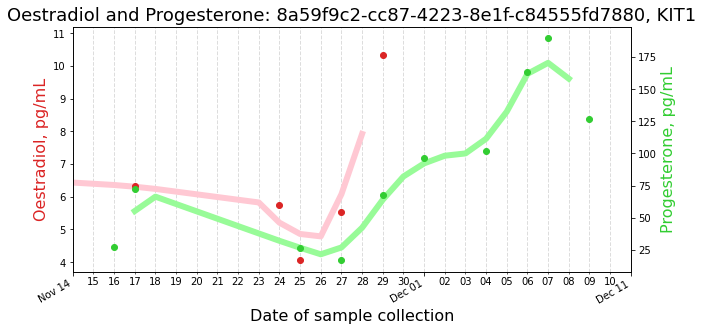

Number of samples retrieved: 15
Number of estradiol measurements retrieved: 10
2022-01-04 00:00:00 2022-11-04 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '22/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '28/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '30/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '15/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29',
               '2022-10-30', '2022-10-31', '2022-11-01', '2022-11-02',
               '2022-11-03', '2022-11-04'],
              dtype='datetime64[ns]', name='collectedDate', length=305, freq='D') DatetimeIndex(['2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25',
               '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29',
               '2022-03-30', '2022-03-31', '2022-04-01', '2022-04-02',
               '2022-04-03', '2022-04-04', '2022-04-05', '2022-04-06',
               '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10',
               '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14',
               '2022-04-15', '2022-04-16', '2022-04-

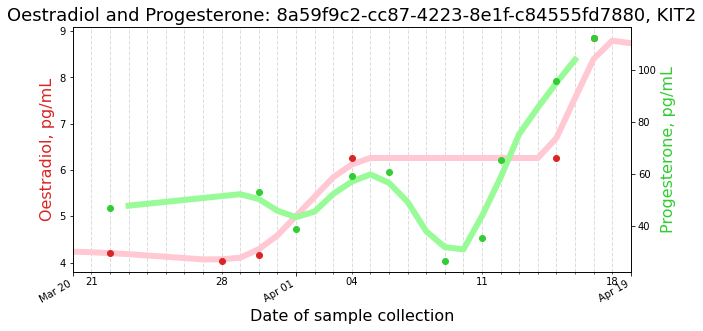

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['2', '1']
Number of samples retrieved: 16
Number of estradiol measurements retrieved: 10
2022-03-13 00:00:00 2022-12-03 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '13/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '19/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22',
               ...
               '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27',
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-03'],
              dtype='datetime64[ns]', name='collectedDate', length=266, freq='D') DatetimeIndex(['2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
               '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28',
               '2022-03-29', '2022-03-30'],
        

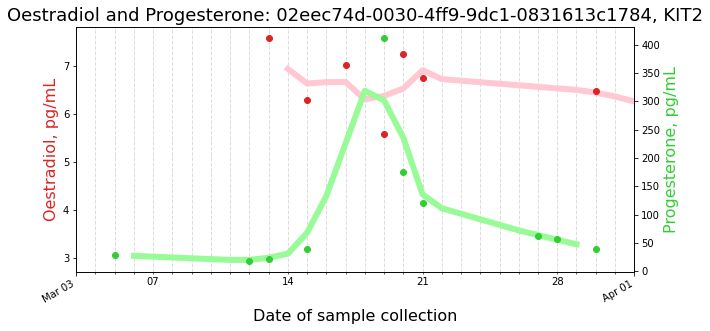

Number of samples retrieved: 16
Number of estradiol measurements retrieved: 10
2021-02-12 00:00:00 2021-12-14 00:00:00
Number of progesterone measurements retrieved: 10


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '23/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '27/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '28/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '30/

DatetimeIndex(['2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-20', '2021-02-21',
               ...
               '2021-12-05', '2021-12-06', '2021-12-07', '2021-12-08',
               '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12',
               '2021-12-13', '2021-12-14'],
              dtype='datetime64[ns]', name='collectedDate', length=306, freq='D') DatetimeIndex(['2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-27', '2021-11-28', '2021-11-29', '2021-11-30',
               '2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04',
               '2021-12-05', '2021-12-06', '2021-12-07', '2021-12-08',
               '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12',
               '2021-12-13', '2021-12-14'],
              dtype='datetime64[ns]', name='collectedDate', freq='D')
No answers data found
No bleeding recorded for this partici

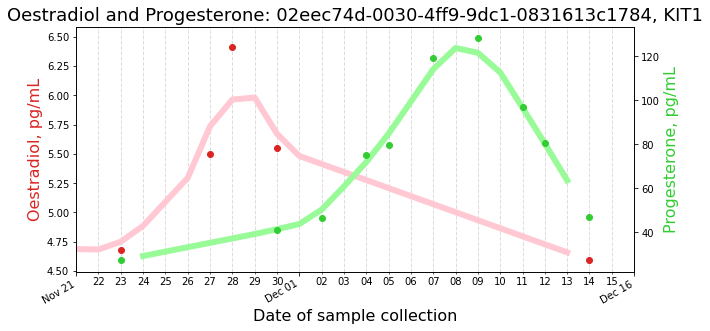

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['1', '2']
Number of samples retrieved: 16
Number of estradiol measurements retrieved: 10
2021-02-12 00:00:00 2021-12-12 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '14/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '22/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '24/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '26/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-20', '2021-02-21',
               ...
               '2021-12-03', '2021-12-04', '2021-12-05', '2021-12-06',
               '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
               '2021-12-11', '2021-12-12'],
              dtype='datetime64[ns]', name='collectedDate', length=304, freq='D') DatetimeIndex(['2021-11-14', '2021-11-15', '2021-11-16', '2021-11-17',
               '2021-11-18', '2021-11-19', '2021-11-20', '2021-11-21',
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29',
               '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
               '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09', '2021-12-

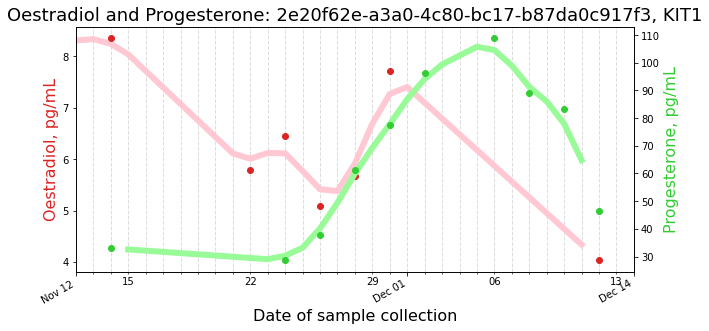

Number of samples retrieved: 15
Number of estradiol measurements retrieved: 10


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '19/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '21/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '23/

2022-02-04 00:00:00 2022-09-03 00:00:00
Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07',
               '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11',
               '2022-02-12', '2022-02-13',
               ...
               '2022-08-25', '2022-08-26', '2022-08-27', '2022-08-28',
               '2022-08-29', '2022-08-30', '2022-08-31', '2022-09-01',
               '2022-09-02', '2022-09-03'],
              dtype='datetime64[ns]', name='collectedDate', length=212, freq='D') DatetimeIndex(['2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
               '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28',
               '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
            

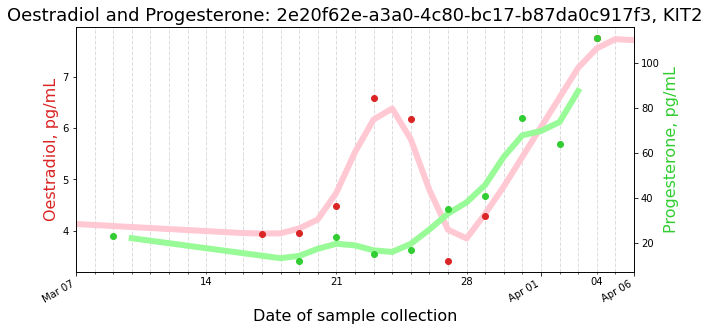

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['2', '1']
Number of samples retrieved: 15
Number of estradiol measurements retrieved: 10
2022-02-04 00:00:00 2022-12-03 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '19/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '22/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '24/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07',
               '2022-02-08', '2022-02-09', '2022-02-10', '2022-02-11',
               '2022-02-12', '2022-02-13',
               ...
               '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27',
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-03'],
              dtype='datetime64[ns]', name='collectedDate', length=303, freq='D') DatetimeIndex(['2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15',
               '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-19',
               '2022-03-20', '2022-03-21', '2022-03-22', '2022-03-23',
               '2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27',
               '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
               '2022-04-05'],
              dtype='d

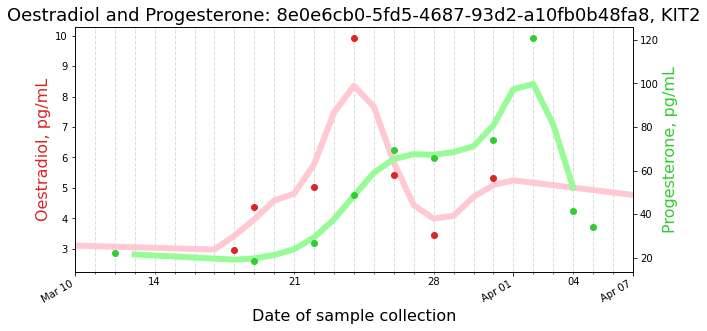

Number of samples retrieved: 16
Number of estradiol measurements retrieved: 10
2021-01-12 00:00:00 2021-12-18 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '24/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '29/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '13/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21',
               ...
               '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12',
               '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
               '2021-12-17', '2021-12-18'],
              dtype='datetime64[ns]', name='collectedDate', length=341, freq='D') DatetimeIndex(['2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27',
               '2021-11-28', '2021-11-29', '2021-11-30', '2021-12-01',
               '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05',
               '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09',
               '2021-12-10', '2021-12-11', '2021-12-12', '2021-12-13',
               '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17',
               '2021-12-18'],
              dtype='d

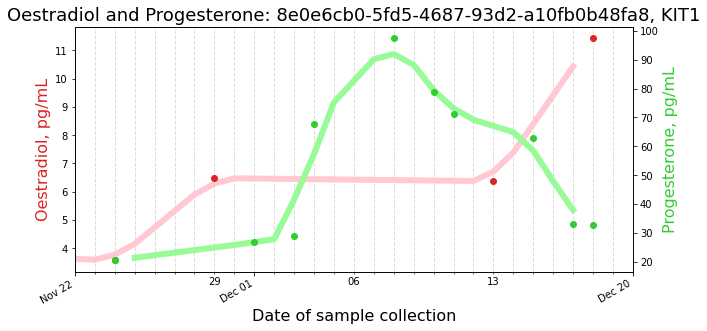

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
No hormone measurements found for this participant
['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['1']
Number of samples retrieved: 15
Number of estradiol measurements retrieved: 10
2021-03-12 00:00:00 2021-11-30 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '16/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '22/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '23/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-03-12', '2021-03-13', '2021-03-14', '2021-03-15',
               '2021-03-16', '2021-03-17', '2021-03-18', '2021-03-19',
               '2021-03-20', '2021-03-21',
               ...
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30'],
              dtype='datetime64[ns]', name='collectedDate', length=264, freq='D') DatetimeIndex(['2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
               '2021-11-13', '2021-11-14', '2021-11-15', '2021-11-16',
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20',
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-04', '2021-12-

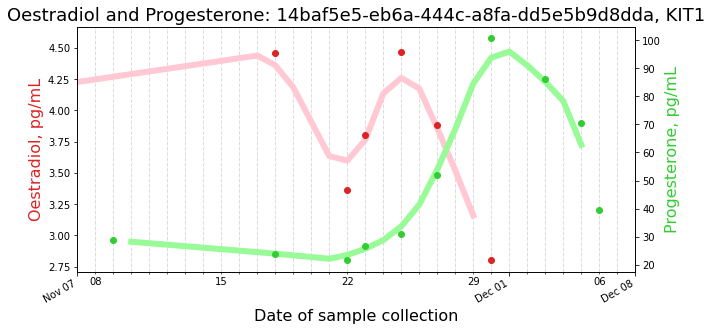

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['2', '1']
Number of samples retrieved: 16
Number of estradiol measurements retrieved: 10
2022-03-29 00:00:00 2022-12-04 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '29/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '14/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '20/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
               '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05',
               '2022-04-06', '2022-04-07',
               ...
               '2022-11-25', '2022-11-26', '2022-11-27', '2022-11-28',
               '2022-11-29', '2022-11-30', '2022-12-01', '2022-12-02',
               '2022-12-03', '2022-12-04'],
              dtype='datetime64[ns]', name='collectedDate', length=251, freq='D') DatetimeIndex(['2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
               '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05',
               '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09',
               '2022-04-10', '2022-04-11', '2022-04-12', '2022-04-13',
               '2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17',
               '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21',
               '2022-04-22', '2022-04-23', '2022-04-

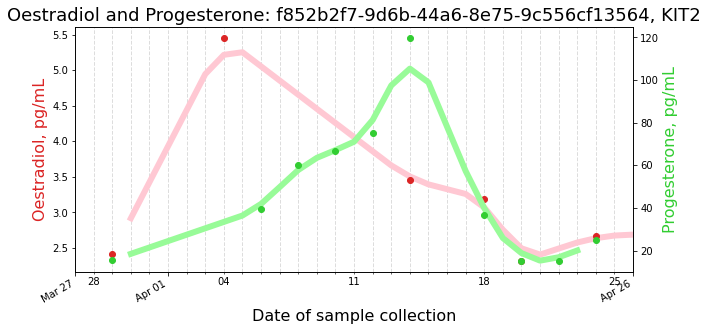

Number of samples retrieved: 15
Number of estradiol measurements retrieved: 10
2021-01-12 00:00:00 2021-11-29 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '14/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '21/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '23/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '25/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21',
               ...
               '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27',
               '2021-11-28', '2021-11-29'],
              dtype='datetime64[ns]', name='collectedDate', length=322, freq='D') DatetimeIndex(['2021-11-14', '2021-11-15', '2021-11-16', '2021-11-17',
               '2021-11-18', '2021-11-19', '2021-11-20', '2021-11-21',
               '2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29',
               '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
               '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07',
               '2021-12-08'],
              dtype='d

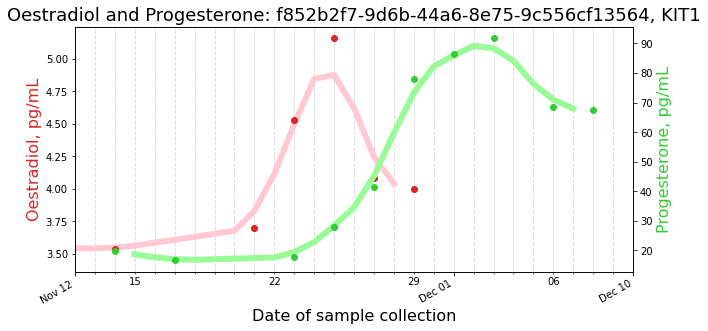

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['1', '2']
Number of samples retrieved: 16
Number of estradiol measurements retrieved: 10
2021-01-12 00:00:00 2021-12-15 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '17/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '25/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '27/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '29/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21',
               ...
               '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09',
               '2021-12-10', '2021-12-11', '2021-12-12', '2021-12-13',
               '2021-12-14', '2021-12-15'],
              dtype='datetime64[ns]', name='collectedDate', length=338, freq='D') DatetimeIndex(['2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20',
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-04', '2021-12-05', '2021-12-06',
               '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10',
               '2021-12-11', '2021-12-12', '2021-12-

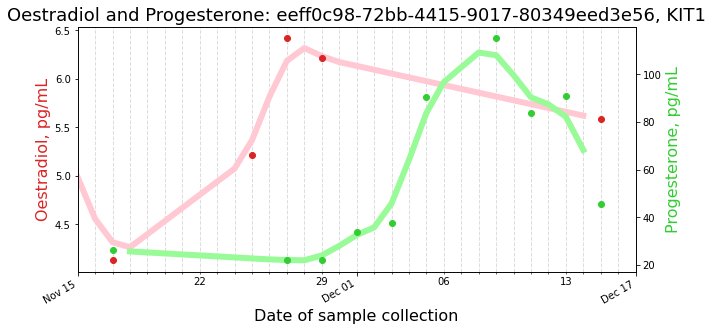

Number of samples retrieved: 14
Number of estradiol measurements retrieved: 10
2022-01-04 00:00:00 2022-11-04 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '17/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '24/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '26/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '28/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29',
               '2022-10-30', '2022-10-31', '2022-11-01', '2022-11-02',
               '2022-11-03', '2022-11-04'],
              dtype='datetime64[ns]', name='collectedDate', length=305, freq='D') DatetimeIndex(['2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28',
               '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
               '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05',
               '2022-04-06', '2022-04-07', '2022-04-08', '2022-04-09',
               '2022-04-10', '2022-04-11'],
        

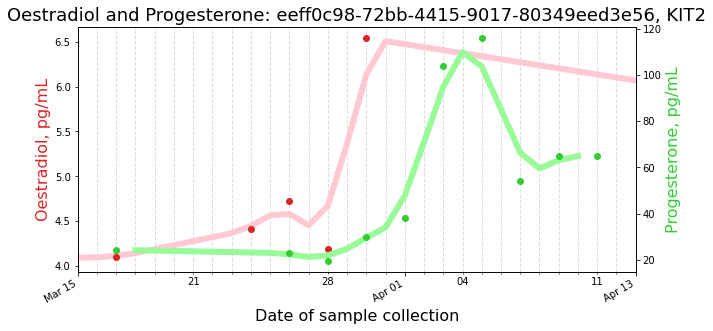

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['3', '1']
Number of samples retrieved: 13
Number of estradiol measurements retrieved: 10
2022-04-14 00:00:00 2022-08-04 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '14/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '15/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '20/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-04-14', '2022-04-15', '2022-04-16', '2022-04-17',
               '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21',
               '2022-04-22', '2022-04-23',
               ...
               '2022-07-26', '2022-07-27', '2022-07-28', '2022-07-29',
               '2022-07-30', '2022-07-31', '2022-08-01', '2022-08-02',
               '2022-08-03', '2022-08-04'],
              dtype='datetime64[ns]', name='collectedDate', length=113, freq='D') DatetimeIndex(['2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11',
               '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15',
               '2022-04-16', '2022-04-17', '2022-04-18', '2022-04-19',
               '2022-04-20', '2022-04-21', '2022-04-22', '2022-04-23',
               '2022-04-24', '2022-04-25', '2022-04-26', '2022-04-27',
               '2022-04-28', '2022-04-29', '2022-04-30'],
              dtype='datetime64[ns]', name='collectedDate', freq=

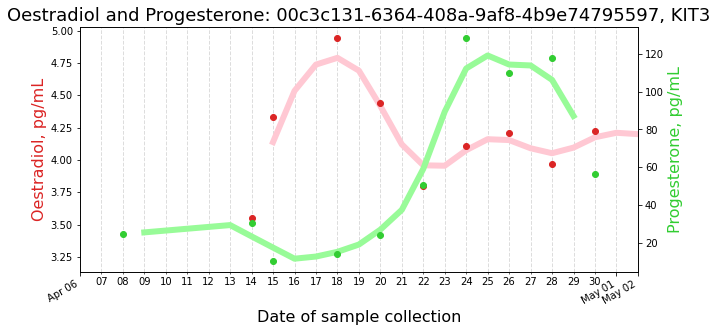

Number of samples retrieved: 14
Number of estradiol measurements retrieved: 10
2021-02-12 00:00:00 2021-12-18 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '24/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '30/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '16/12/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-20', '2021-02-21',
               ...
               '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12',
               '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
               '2021-12-17', '2021-12-18'],
              dtype='datetime64[ns]', name='collectedDate', length=310, freq='D') DatetimeIndex(['2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27',
               '2021-11-28', '2021-11-29', '2021-11-30', '2021-12-01',
               '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05',
               '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09',
               '2021-12-10', '2021-12-11', '2021-12-12', '2021-12-13',
               '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17',
               '2021-12-18'],
              dtype='d

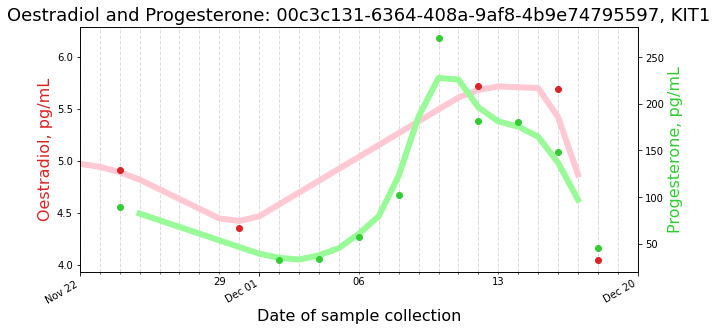

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['2', '1']
Number of samples retrieved: 12
Number of estradiol measurements retrieved: 10
2022-01-04 00:00:00 2022-12-03 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '20/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '22/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '26/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27',
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-03'],
              dtype='datetime64[ns]', name='collectedDate', length=334, freq='D') DatetimeIndex(['2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15',
               '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-19',
               '2022-03-20', '2022-03-21', '2022-03-22', '2022-03-23',
               '2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27',
               '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-02', '2022-04-03'],
              dtype='datetime64[ns]', name='collectedDate', freq=

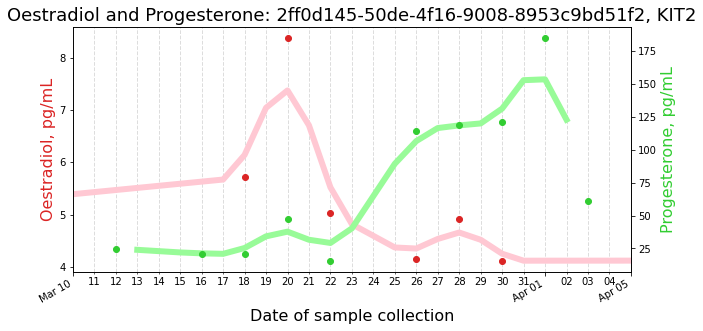

Number of samples retrieved: 15
Number of estradiol measurements retrieved: 10
2021-02-12 00:00:00 2021-12-18 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '22/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '28/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '30/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '14/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-20', '2021-02-21',
               ...
               '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12',
               '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
               '2021-12-17', '2021-12-18'],
              dtype='datetime64[ns]', name='collectedDate', length=310, freq='D') DatetimeIndex(['2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29',
               '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
               '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11',
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17', '2021-12-

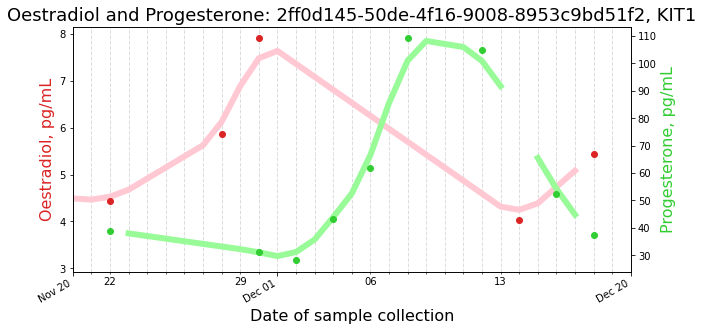

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
No hormone measurements found for this participant
['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['2', '1']
Number of samples retrieved: 15
Number of estradiol measurements retrieved: 10
2022-01-04 00:00:00 2022-07-04 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '13/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '20/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '22/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28',
               '2022-06-29', '2022-06-30', '2022-07-01', '2022-07-02',
               '2022-07-03', '2022-07-04'],
              dtype='datetime64[ns]', name='collectedDate', length=182, freq='D') DatetimeIndex(['2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28',
               '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01',
               '2022-04-02', '2022-04-03', '2022-04-04', '2022-04-05',
               '2022-04-06', '2022-04-07'],
        

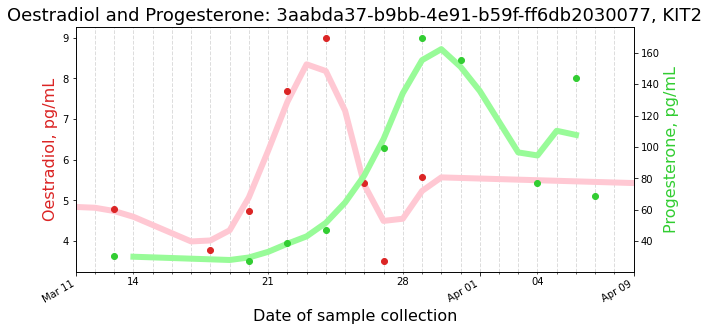

Number of samples retrieved: 15
Number of estradiol measurements retrieved: 10
2021-01-12 00:00:00 2021-12-13 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '22/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '26/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '27/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '29/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21',
               ...
               '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11',
               '2021-12-12', '2021-12-13'],
              dtype='datetime64[ns]', name='collectedDate', length=336, freq='D') DatetimeIndex(['2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29',
               '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
               '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11',
               '2021-12-12', '2021-12-13'],
              dtype='datetime64[ns]', name='collectedDate', freq='D')
No answer

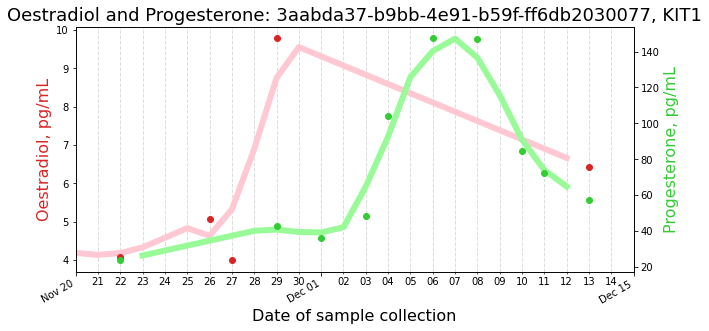

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['2', '1']
Number of samples retrieved: 14
Number of estradiol measurements retrieved: 10
2022-01-04 00:00:00 2022-09-04 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '21/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '23/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '25/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29',
               '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02',
               '2022-09-03', '2022-09-04'],
              dtype='datetime64[ns]', name='collectedDate', length=244, freq='D') DatetimeIndex(['2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18',
               '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26',
               '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30',
               '2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03',
               '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07',
               '2022-04-08', '2022-04-09'],
        

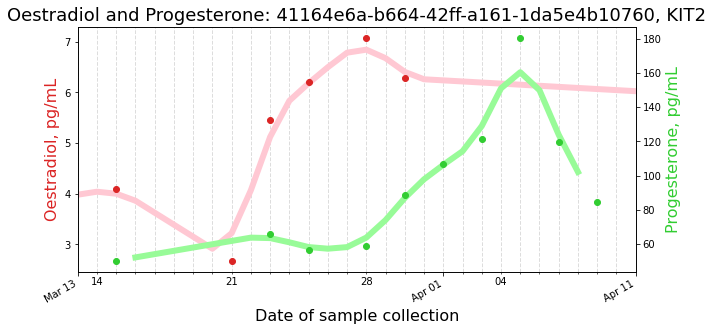

Number of samples retrieved: 16
Number of estradiol measurements retrieved: 10
2021-01-12 00:00:00 2021-12-15 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '19/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '24/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '26/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '28/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21',
               ...
               '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09',
               '2021-12-10', '2021-12-11', '2021-12-12', '2021-12-13',
               '2021-12-14', '2021-12-15'],
              dtype='datetime64[ns]', name='collectedDate', length=338, freq='D') DatetimeIndex(['2021-11-19', '2021-11-20', '2021-11-21', '2021-11-22',
               '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-27', '2021-11-28', '2021-11-29', '2021-11-30',
               '2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04',
               '2021-12-05', '2021-12-06', '2021-12-07', '2021-12-08',
               '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12',
               '2021-12-13', '2021-12-14', '2021-12-

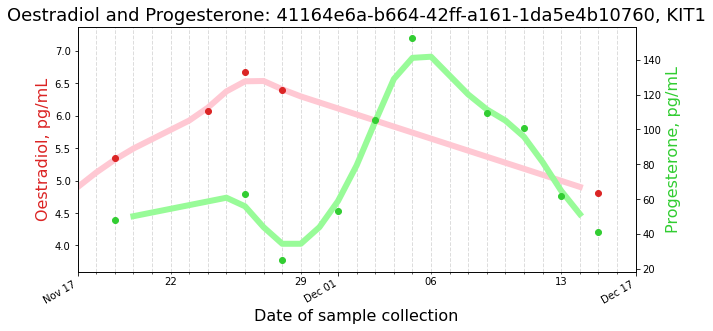

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['2', '1']
Number of samples retrieved: 16
Number of estradiol measurements retrieved: 10
2022-01-04 00:00:00 2022-12-03 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '19/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '24/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2022-11-24', '2022-11-25', '2022-11-26', '2022-11-27',
               '2022-11-28', '2022-11-29', '2022-11-30', '2022-12-01',
               '2022-12-02', '2022-12-03'],
              dtype='datetime64[ns]', name='collectedDate', length=334, freq='D') DatetimeIndex(['2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15',
               '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-19',
               '2022-03-20', '2022-03-21', '2022-03-22', '2022-03-23',
               '2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27',
               '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-02'],
              dtype='datetime64[ns]', name='collectedDate', freq='D')
No answer

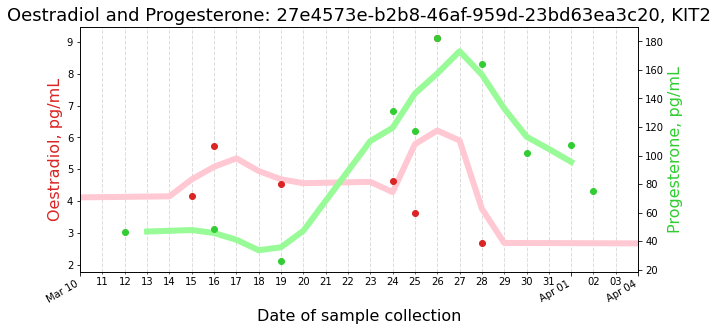

Number of samples retrieved: 16
Number of estradiol measurements retrieved: 10
2021-02-12 00:00:00 2021-11-29 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '13/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '20/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '22/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-20', '2021-02-21',
               ...
               '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27',
               '2021-11-28', '2021-11-29'],
              dtype='datetime64[ns]', name='collectedDate', length=291, freq='D') DatetimeIndex(['2021-11-13', '2021-11-14', '2021-11-15', '2021-11-16',
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20',
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02',
               '2021-12-03', '2021-12-04', '2021-12-05', '2021-12-06',
               '2021-12-07', '2021-12-08'],
        

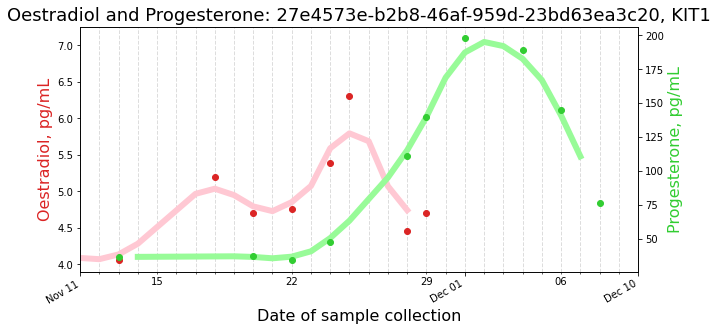

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
No hormone measurements found for this participant
['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
No hormone measurements found for this participant
['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['2', '1']
Number of samples retrieved: 14
Number of estradiol measurements retrieved: 10
2022-01-03 00:00:00 2022-11-03 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '16/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '22/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-08', '2022-01-09', '2022-01-10',
               '2022-01-11', '2022-01-12',
               ...
               '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28',
               '2022-10-29', '2022-10-30', '2022-10-31', '2022-11-01',
               '2022-11-02', '2022-11-03'],
              dtype='datetime64[ns]', name='collectedDate', length=305, freq='D') DatetimeIndex(['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04',
               '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08',
               '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12',
               '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-

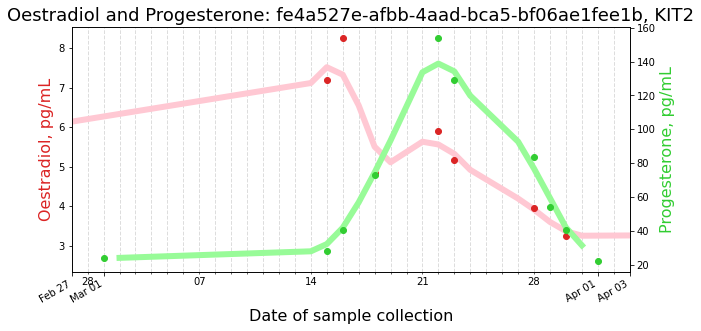

Number of samples retrieved: 16
Number of estradiol measurements retrieved: 10
2021-01-12 00:00:00 2021-12-11 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '20/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '24/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '25/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '29/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21',
               ...
               '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05',
               '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09',
               '2021-12-10', '2021-12-11'],
              dtype='datetime64[ns]', name='collectedDate', length=334, freq='D') DatetimeIndex(['2021-11-12', '2021-11-13', '2021-11-14', '2021-11-15',
               '2021-11-16', '2021-11-17', '2021-11-18', '2021-11-19',
               '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27',
               '2021-11-28', '2021-11-29', '2021-11-30', '2021-12-01',
               '2021-12-02', '2021-12-03', '2021-12-04', '2021-12-05',
               '2021-12-06', '2021-12-07', '2021-12-

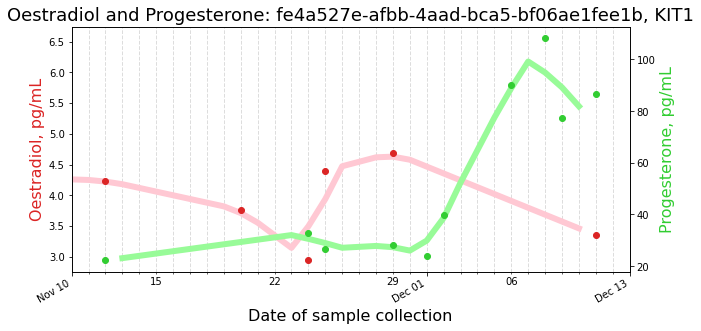

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['1', '2']
Number of samples retrieved: 15
Number of estradiol measurements retrieved: 10
2021-02-12 00:00:00 2021-11-28 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '16/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '20/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '23/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-20', '2021-02-21',
               ...
               '2021-11-19', '2021-11-20', '2021-11-21', '2021-11-22',
               '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-27', '2021-11-28'],
              dtype='datetime64[ns]', name='collectedDate', length=290, freq='D') DatetimeIndex(['2021-11-11', '2021-11-12', '2021-11-13', '2021-11-14',
               '2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18',
               '2021-11-19', '2021-11-20', '2021-11-21', '2021-11-22',
               '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-27', '2021-11-28', '2021-11-29', '2021-11-30',
               '2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04',
               '2021-12-05', '2021-12-06', '2021-12-

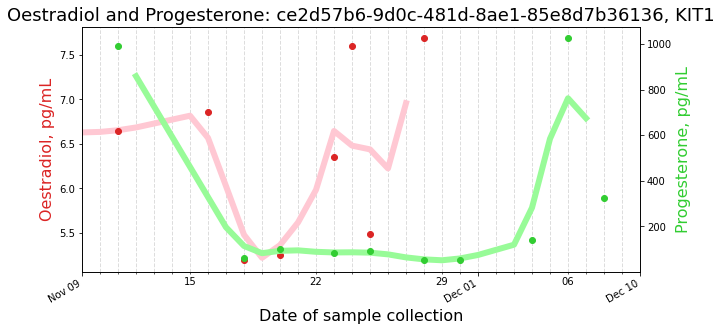

Number of samples retrieved: 13
Number of estradiol measurements retrieved: 10
2022-01-05 00:00:00 2022-07-04 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '14/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '19/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '20/04/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '21/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28',
               '2022-06-29', '2022-06-30', '2022-07-01', '2022-07-02',
               '2022-07-03', '2022-07-04'],
              dtype='datetime64[ns]', name='collectedDate', length=181, freq='D') DatetimeIndex(['2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10',
               '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14',
               '2022-04-15', '2022-04-16', '2022-04-17', '2022-04-18',
               '2022-04-19', '2022-04-20', '2022-04-21', '2022-04-22',
               '2022-04-23', '2022-04-24', '2022-04-25', '2022-04-26',
               '2022-04-27', '2022-04-28', '2022-04-29', '2022-04-30',
               '2022-05-01', '2022-05-02', '2022-05-

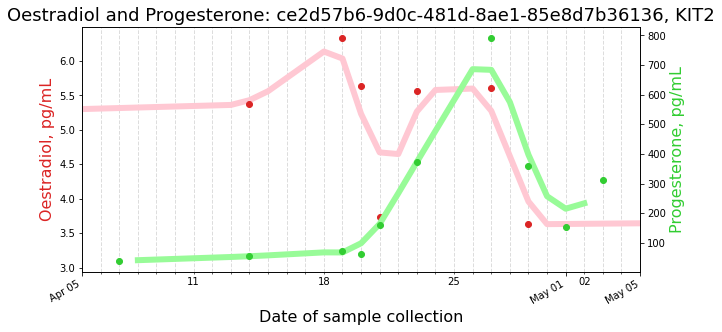

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['1']
Number of samples retrieved: 14
Number of estradiol measurements retrieved: 10
2021-07-11 00:00:00 2021-11-29 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '14/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '15/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '17/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '19/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-07-11', '2021-07-12', '2021-07-13', '2021-07-14',
               '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18',
               '2021-07-19', '2021-07-20',
               ...
               '2021-11-20', '2021-11-21', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-27',
               '2021-11-28', '2021-11-29'],
              dtype='datetime64[ns]', name='collectedDate', length=142, freq='D') DatetimeIndex(['2021-11-07', '2021-11-08', '2021-11-09', '2021-11-10',
               '2021-11-11', '2021-11-12', '2021-11-13', '2021-11-14',
               '2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18',
               '2021-11-19', '2021-11-20', '2021-11-21', '2021-11-22',
               '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-27', '2021-11-28', '2021-11-29'],
              dtype='datetime64[ns]', name='collectedDate', freq=

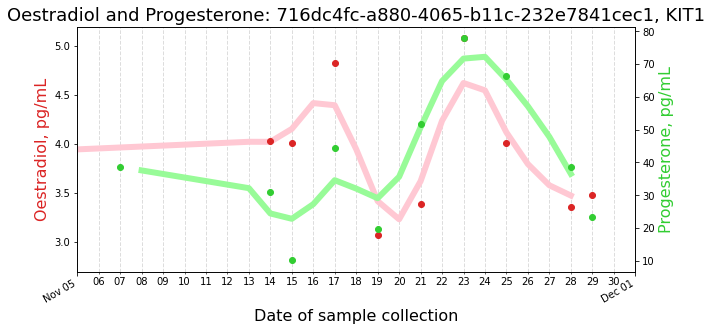

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['1']
Number of samples retrieved: 16
Number of estradiol measurements retrieved: 10
2021-02-12 00:00:00 2021-11-30 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '15/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '20/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '22/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '24/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-20', '2021-02-21',
               ...
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30'],
              dtype='datetime64[ns]', name='collectedDate', length=292, freq='D') DatetimeIndex(['2021-11-15', '2021-11-16', '2021-11-17', '2021-11-18',
               '2021-11-19', '2021-11-20', '2021-11-21', '2021-11-22',
               '2021-11-23', '2021-11-24', '2021-11-25', '2021-11-26',
               '2021-11-27', '2021-11-28', '2021-11-29', '2021-11-30',
               '2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04',
               '2021-12-05', '2021-12-06', '2021-12-07', '2021-12-08',
               '2021-12-09'],
              dtype='d

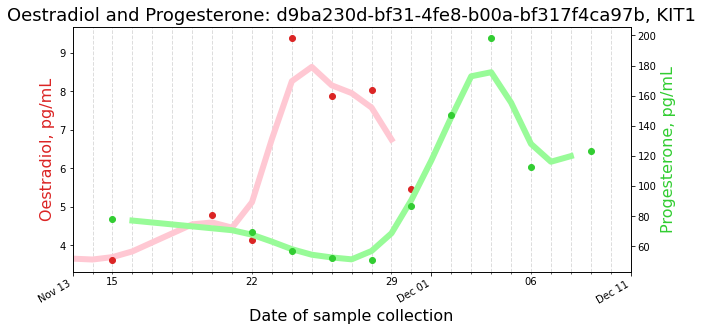

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['1', '2']
Number of samples retrieved: 16
Number of estradiol measurements retrieved: 10
2021-01-12 00:00:00 2021-12-18 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '22/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '28/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '29/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '18/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
               '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21',
               ...
               '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12',
               '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
               '2021-12-17', '2021-12-18'],
              dtype='datetime64[ns]', name='collectedDate', length=341, freq='D') DatetimeIndex(['2021-11-22', '2021-11-23', '2021-11-24', '2021-11-25',
               '2021-11-26', '2021-11-27', '2021-11-28', '2021-11-29',
               '2021-11-30', '2021-12-01', '2021-12-02', '2021-12-03',
               '2021-12-04', '2021-12-05', '2021-12-06', '2021-12-07',
               '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-11',
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17', '2021-12-

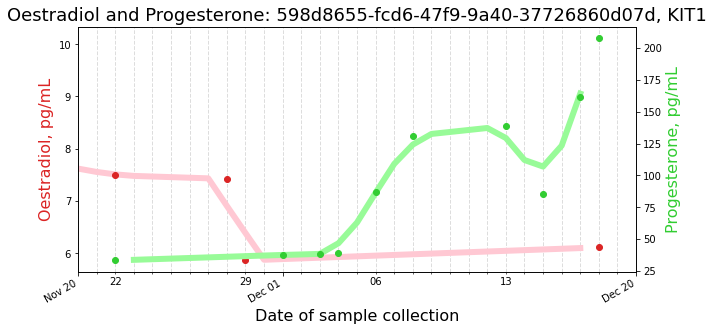

Number of samples retrieved: 16
Number of estradiol measurements retrieved: 10
2022-01-04 00:00:00 2022-09-04 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '19/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '25/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '27/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '28/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2022-08-26', '2022-08-27', '2022-08-28', '2022-08-29',
               '2022-08-30', '2022-08-31', '2022-09-01', '2022-09-02',
               '2022-09-03', '2022-09-04'],
              dtype='datetime64[ns]', name='collectedDate', length=244, freq='D') DatetimeIndex(['2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22',
               '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26',
               '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30',
               '2022-03-31', '2022-04-01', '2022-04-02', '2022-04-03',
               '2022-04-04', '2022-04-05', '2022-04-06', '2022-04-07',
               '2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11',
               '2022-04-12', '2022-04-13', '2022-04-

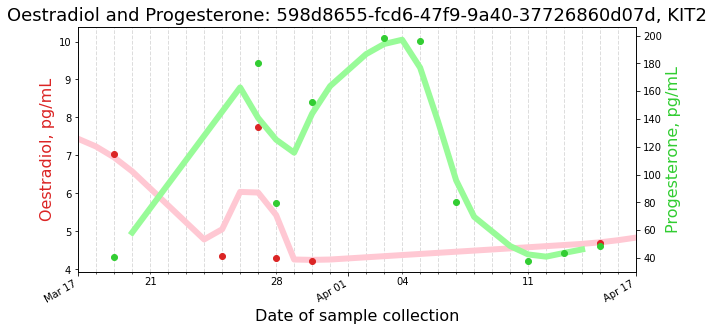

['d4c17c29-86ef-4dfb-b2b6-75d7a3f001af', 'c8a0dfc1-282e-4913-aabd-69c38d5f7d4e'] ['f977ee05-d11b-45b8-9d38-50d69e09ebf2', '5c6e5d03-0761-45e1-b7be-0e812b20699c']
Found kits: ['1']
Number of samples retrieved: 14
Number of estradiol measurements retrieved: 10
2021-02-12 00:00:00 2021-11-30 00:00:00


C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '13/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '15/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '17/11/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y'))
C:\Users\KatherineRidley\AppData\Local\Temp\ipykernel_30464\638790975.py:361: UserWarning: Parsing '19/

Number of progesterone measurements retrieved: 10
DatetimeIndex(['2021-02-12', '2021-02-13', '2021-02-14', '2021-02-15',
               '2021-02-16', '2021-02-17', '2021-02-18', '2021-02-19',
               '2021-02-20', '2021-02-21',
               ...
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30'],
              dtype='datetime64[ns]', name='collectedDate', length=292, freq='D') DatetimeIndex(['2021-11-09', '2021-11-10', '2021-11-11', '2021-11-12',
               '2021-11-13', '2021-11-14', '2021-11-15', '2021-11-16',
               '2021-11-17', '2021-11-18', '2021-11-19', '2021-11-20',
               '2021-11-21', '2021-11-22', '2021-11-23', '2021-11-24',
               '2021-11-25', '2021-11-26', '2021-11-27', '2021-11-28',
               '2021-11-29', '2021-11-30', '2021-12-01', '2021-12-02'],
              dtype='datetime64[ns]', name='collect

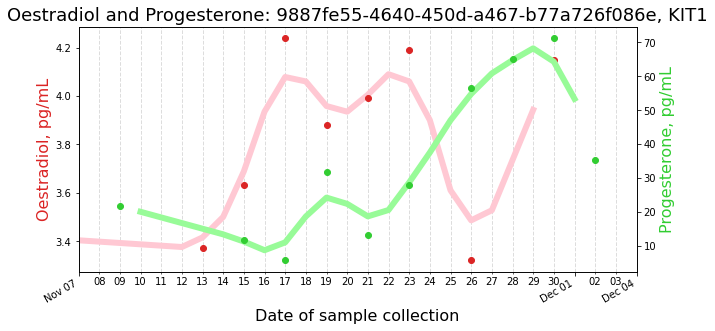

               edata          measurementTestBatchCodeId_x edata_r  pdata  \
collectedDate                                                               
2021-11-14       NaN                                   NaN     NaN  20.22   
2021-11-15       NaN                                   NaN     NaN    NaN   
2021-11-16      6.11  c8a0dfc1-282e-4913-aabd-69c38d5f7d4e    6.11   8.58   
2021-11-17       NaN                                   NaN     NaN    NaN   
2021-11-18      4.98  c8a0dfc1-282e-4913-aabd-69c38d5f7d4e    4.98    NaN   
...              ...                                   ...     ...    ...   
2021-11-26      3.32  c8a0dfc1-282e-4913-aabd-69c38d5f7d4e    3.32  56.54   
2021-11-27       NaN                                   NaN     NaN    NaN   
2021-11-28       NaN                                   NaN     NaN  65.19   
2021-11-29       NaN                                   NaN     NaN    NaN   
2021-11-30      4.15  c8a0dfc1-282e-4913-aabd-69c38d5f7d4e    4.15  71.35   

In [25]:
import pandas as pd
import numpy as np
import os
import math
import scipy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import boto3
import json
import boto3.session
# https://boto3.amazonaws.com/v1/documentation/api/latest/guide/dynamodb.html#querying-and-scanning
from boto3.dynamodb.conditions import GreaterThan, Key, Attr
import dynamo_pandas
from dynamo_pandas import get_df, keys, put_df
import datetime
from datetime import timedelta
import seaborn as sns
from docx import Document
from docx.shared import Mm
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.enum.table import WD_ALIGN_VERTICAL
from docx.enum.text import WD_BREAK
#from docx.enum.table import WD_ALIGN_HORIZONTAL
from docx2pdf import convert

def connect_dynamodb(region = 'eu-west-2', profile = 'default'):
    # Connect to DynamoDB
    my_session = boto3.session.Session(region_name = region, profile_name = profile)
    global dynamodb
    dynamodb = my_session.resource('dynamodb')

connect_dynamodb('eu-west-2','default')

#define tables
table_athlete = dynamodb.Table('Athlete-qx7lirnxjfdzxoss6cmomxzgpe-staging')
table_sample = dynamodb.Table('Sample-qx7lirnxjfdzxoss6cmomxzgpe-staging')
table_measurement = dynamodb.Table('Measurement-qx7lirnxjfdzxoss6cmomxzgpe-staging')
table_study = dynamodb.Table('Study-qx7lirnxjfdzxoss6cmomxzgpe-staging')
table_testbatchcode = dynamodb.Table('TestBatchCode-qx7lirnxjfdzxoss6cmomxzgpe-staging')
table_answer = dynamodb.Table('Answer-qx7lirnxjfdzxoss6cmomxzgpe-staging')
table_organisation = dynamodb.Table('Organisation-qx7lirnxjfdzxoss6cmomxzgpe-staging')

def get_org_from_dynamo(table):

    org_df_meta=dynamo_pandas.get_df(table=table)

    inTitles = False
    while inTitles == False:
        
        org = input('Enter name of organisation: ')
            # Is prog in response?
    #         print(len(prog_df[prog_df.title == prog]))
        if len(org_df_meta[org_df_meta.name == org]) == 1:
            
            inTitles = True
            org_df = org_df_meta[org_df_meta.name == org] 

        else:
            inTitles=False
            print('Organisation not found. Please try again and ensure it is typed correctly')
            
                
    print('Organisation Name: ' + str(org_df['name'].values[0]))      
        
    org_code = org_df['code'].values[0]
    org_code_GCR = org_df['groupCanRead'].values[0]
    print('Organisation code:', org_code)

    return org_code_GCR

#get programme from org

def get_prog_from_org(org_code_GCR):  
    
    prog_df_meta=dynamo_pandas.get_df(table='Study-qx7lirnxjfdzxoss6cmomxzgpe-staging')

    prog_df_org=prog_df_meta[prog_df_meta['groupCanRead']==org_code_GCR]

    if len(prog_df_org)==0:
        print('No programmes found for this organisation')
    elif len(prog_df_org)==1:
        prog=prog_df_org['title'].values[0]
        print('This organisation has one programme:', prog)
        prog_df=prog_df_org[prog_df_org['title']==prog]
    else:
        print('Please input programme from this list: ')
        print(prog_df_org['title'])
        
        inTitles = False
        while inTitles == False:
            prog = input('Enter title of programme: ')
            
            if len(prog_df_org[prog_df_org.title == prog]) == 1:
                inTitles = True
                prog_df = prog_df_org[prog_df_org.title == prog] 
            else:
                print('Programme name not found. Please try again and ensure it is typed correctly')

    print('Programme title: ' + str(prog_df['title'].values[0]))      
        
    programme_id = prog_df['id'].values[0]
    print('Programme ID:', programme_id)
    return programme_id

#Get participants
def get_participants_from_study(programme_id, org_code_GCR):

    par_df_meta=dynamo_pandas.get_df(table='Athlete-qx7lirnxjfdzxoss6cmomxzgpe-staging')
    par_df_prog=par_df_meta[par_df_meta['athleteStudyId']==programme_id]
    par_id_l=[]


    if len(par_df_prog)==0:
        print('No participants found for this programme')
    elif len(par_df_prog)==1:
        par=par_df_prog['name'].values[0]
        par_df=par_df_prog[par_df_prog['name']==par]
        par_id = par_df['id'].values[0]
        par_id_l.append(par_id)
        print('This study has one participant:', par)
    else:
        print('This programme has', len(par_df_prog), 'participants')
        print('Please input participant name from this list | or type ALL to generate batch report: ')
        print(par_df_prog['name'])
        inTitles = False
        while inTitles == False:
            par = input('Enter name of participant, or enter ALL for batch report: ')
            
            if len(par_df_prog[par_df_prog.name == par]) == 1:
                inTitles = True
                par_df = par_df_prog[par_df_prog.name == par]
                print('Participant Name: ' + str(par_df['name'].values[0]))  
                par_id = par_df['id'].values[0]
                par_id_l.append(par_id)
                print('Participant ID:', par_id)
                
            elif (par=='ALL')|(par=='all')|(par=='All'):
                par_df=par_df_prog
                par_id_l=list(par_df['id'])
                inTitles = True
                print('Generating batch report for entire programme...')
            else:
                print('Participant not found. Please try again and ensure their name is typed correctly')

    
    return par_id_l

def get_participants_from_org(org_code_GCR):

    par_df_meta=dynamo_pandas.get_df(table='Athlete-qx7lirnxjfdzxoss6cmomxzgpe-staging')
    par_id_l=[]
    

    org_code=org_code_GCR[:-4]
    orgAdmin= org_code+'Admin'

    par_df_org=par_df_meta.loc[par_df_meta['groupCanAdmin']==orgAdmin]
    
    #print(len(par_df_org_id_list), len(par_df_prog_id_list))

    if len(par_df_org)==0:
        print('No participants found for this programme')
    elif len(par_df_org)==1:
        par=par_df_org['name'].values[0]
        par_df=par_df_org[par_df_org['name']==par]
        par_id= par_df['id'].values[0]
        par_id_l.append(par_id)
        print('This organisation has one participant:', par)
    else:
        print('This organisation has', len(par_df_org), 'participants')
        print('Please input participant name from this list | or type ALL to generate batch report: ')
        print(par_df_org['name'])
        inTitles = False
        while inTitles == False:
            par = input('Enter name of participant, or enter ALL for batch report: ')
            
            if len(par_df_org[par_df_org.name == par]) == 1:
                inTitles = True
                par_df = par_df_org[par_df_org.name == par]
                print('Participant Name: ' + str(par_df['name'].values[0]))  
                
                par_id = par_df['id'].values[0]
                par_id_l.append(par_id)
                print('Participant ID:', par_id)
                
            elif (par=='ALL')|(par=='all')|(par=='All'):
                par_df=par_df_org
                par_id_l=list(par_df['id'])
                inTitles = True
                print('Generating batch report for entire organisation...')
            else:
                print('Participant not found. Please try again and ensure their name is typed correctly')

    
    return par_id_l


def get_test_batch_codes(table1):
    #Fetch test batch code ids for estradiol and progesterone
    tbc_df_meta=dynamo_pandas.get_df(table=table1)
    #tbc_df_meta_p = tbc_df_meta[tbc_df_meta['participantId']==par]
    
    estradiol_tbc_l=list(tbc_df_meta.loc[(tbc_df_meta['name']=='PTP_ELISA_IBL_ESTRADIOL') | (tbc_df_meta['name']=='ELISA_IBL_ESTRADIOL'), 'id'])
    progesterone_tbc_l=list(tbc_df_meta.loc[(tbc_df_meta['name']=='PTP_ELISA_IBL_PROGESTERONE') | (tbc_df_meta['name']=='ELISA_IBL_PROGESTERONE'), 'id'])

    #estradiol_tbc_id = tbc_df_meta.loc[tbc_df_meta['name']=='ELISA_IBL_ESTRADIOL', 'id'].iloc[0] 
    #progesterone_tbc_id = tbc_df_meta.loc[tbc_df_meta['name']=='ELISA_IBL_PROGESTERONE', 'id'].iloc[0] 

    return estradiol_tbc_l, progesterone_tbc_l



def scan_table(dynamoTable, filterExp, expAttrNames):
    
    
    results = []
    projExp = ''
    fExp = ''
    
    # Construct ProjectionExpression string
    for key, value in expAttrNames.items() :
        if projExp == '':
            projExp = key
        else:
            projExp = projExp + ', ' + key 
        
    # Construct FilterExpression string
    for key, value in filterExp.items() :
        if fExp == '':
            fExp = 'Attr(\'{}\').eq(\'{}\')'.format(key,value)
        else:
            fExp = fExp + ' & Attr(\'{}\').eq(\'{}\')'.format(key,value) 
    
    
    response = dynamoTable.scan(
        ProjectionExpression=projExp,
        FilterExpression = eval(fExp),
        ExpressionAttributeNames = expAttrNames # Need to use ExpressionAttributeNames as some field names are reserved keywords (e.g. value)
    )
    results = response['Items']
    
    # Get all items (https://dynobase.dev/dynamodb-python-with-boto3/#scan)
    while 'LastEvaluatedKey' in response:
        response = dynamoTable.scan(ExclusiveStartKey = response['LastEvaluatedKey'],
                                    ProjectionExpression=projExp,
                                    FilterExpression = eval(fExp),
                                    ExpressionAttributeNames = expAttrNames # Need to use ExpressionAttributeNames as value is a reserved keyword
                                          )
        results.extend(response['Items'])

    return results

def getmostrecentkit(par):
    kit_measurements = scan_table(table_measurement,
                                    filterExp = {'measurementAthleteId' : par, 
                                    'measurementTestBatchCodeId' : estradiol_tbc_id},
                                    expAttrNames = {'#i' : 'id', '#b' : 'barcode',
                                                    '#m' : 'measurementAthleteId' , 
                                                    '#v' : 'value', 
                                                    '#k' : 'kit', 
                                                    '#c' : 'collectedAt', 
                                                    '#t':'measurementTestBatchCodeId'})


        

    measurement_df = pd.DataFrame.from_dict(kit_measurements)
    if len(measurement_df)==0:
        print('No hormone measurements found for this participant')
    else:
    
        mostrecentkit=[]


        kitlist=measurement_df.loc[measurement_df['measurementAthleteId']==par, 'kit'].unique()
        print('Finding most recent kit...')
        if len(kitlist)>0:
            kitnums = [kit[3:] for kit in kitlist]
            maxkit=max(kitnums)
            df_par_kit=measurement_df[(measurement_df['measurementAthleteId']==par) & (measurement_df['kit']=='KIT'+maxkit)]
            
            #print(len(df_par_kit))
            mostrecentkit.append(df_par_kit)
        if len(mostrecentkit)==0:
            print('No kits found for this participant ID:', par)
        else:

            df_mostrecentkit=pd.concat(mostrecentkit)

            return df_mostrecentkit

def getallkitnums(par):
    kit_measurements = scan_table(table_measurement,
                                    filterExp = {'measurementAthleteId' : par},
                                    expAttrNames = {'#i' : 'id', '#b' : 'barcode',
                                                    '#m' : 'measurementAthleteId' , 
                                                    '#v' : 'value', 
                                                    '#k' : 'kit', 
                                                    '#c' : 'collectedAt', 
                                                    '#t':'measurementTestBatchCodeId'})


        

    measurement_df = pd.DataFrame.from_dict(kit_measurements)
    if len(measurement_df)==0:
        print('No hormone measurements found for this participant')
        kitlist=[]
        return kitlist
    else:
        kitlist=measurement_df.loc[measurement_df['measurementAthleteId']==par, 'kit'].unique()
        kitnums = [kit[3:] for kit in kitlist]
        print('Found kits:', kitnums)
    
        
        return kitlist

#---------------------------------------------------------

def get_e_df_and_p_df(kitnum, par, estradiol_tbc_id_l, progesterone_tbc_id_l):

    estradiol_measurements = scan_table(table_measurement,
                                    filterExp = {'measurementAthleteId' : par,
                                                'kit' : kitnum},
                                    expAttrNames = {'#i' : 'id', 
                                                    '#b' : 'barcode' , 
                                                    '#v' : 'value', 
                                                    '#k' : 'kit', 
                                                    '#c' : 'collectedAt',
                                                    '#t':'measurementTestBatchCodeId'})

    
        
# print(estradiol_measurements)
    estradiol_df = pd.DataFrame.from_dict(estradiol_measurements)

    estradiol_df = estradiol_df.loc[estradiol_df['measurementTestBatchCodeId'].isin(estradiol_tbc_id_l)]
    #print(estradiol_tbc_id)
    #estradiol_df = estradiol_df.loc[estradiol_df['measurementTestBatchCodeId']==estradiol_tbc_id]

    print('Number of estradiol measurements retrieved: {}'.format(len(estradiol_df)))
    
    if len(estradiol_df)>0:
        estradiol_df = estradiol_df.rename(columns = {"value" : "edata"})
        estradiol_df['collectedAt'] = pd.to_datetime(estradiol_df['collectedAt'])
        estradiol_df['collectedDate'] = pd.to_datetime(estradiol_df['collectedAt']).dt.date    
        estradiol_df = estradiol_df.sort_values(by=['collectedAt'], ascending = True, ignore_index = True).drop(columns = ['collectedAt'])
        #estradiol_df.loc[estradiol_df['edata'].str.contains('<'), 'edata'] = estradiol_df['edata'].str.replace('<','')
        #estradiol_df.loc[estradiol_df['edata'].str.contains('>'), 'edata'] = estradiol_df['edata'].str.replace('>','')
        estradiol_df['edata_r'] = estradiol_df['edata']
        estradiol_df.loc[estradiol_df['edata'].str.contains('<', na=False), 'edata'] = np.nan
        estradiol_df.loc[estradiol_df['edata'].str.contains('>', na=False), 'edata'] = np.nan

            
        estradiol_df['edata'] = estradiol_df['edata'].astype(float)
        #estradiol_df['edata_r'] = estradiol_df['edata_r'].astype(float)
        
        estradiol_df['linear'] = estradiol_df['edata'].interpolate(method='linear')
        e_df = estradiol_df
        e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'])
        e_df['collectedDate'] = pd.to_datetime(e_df['collectedDate'].dt.strftime('%d/%m/%Y')) 
        print(e_df['collectedDate'].min(), e_df['collectedDate'].max())
        e_df = e_df.set_index('collectedDate')
        e_df= e_df.loc[~e_df.index.duplicated(), :]
        e_df = e_df.resample('1D').asfreq()
        e_df['linear'] = e_df['edata'].interpolate(method='linear')
        e_df = e_df.drop(columns = ['barcode','id','kit'])

        
        # Calculate rolling average with a window
        window = 3
        e_df['rolling'] = e_df['linear'].rolling(window).sum()/window
        e_df['rolling'] = e_df['rolling'].shift(periods = -1)
        #e_df.loc[e_df['edata_r'].str.contains('<', na=False), 'rolling'] = np.nan
        #e_df.loc[e_df['edata_r'].str.contains('>', na=False), 'rolling'] = np.nan
        e_df_n=e_df['edata'].dropna()

        n_max=e_df_n.index.max()

        e_df.loc[e_df.index>n_max, 'rolling'] = np.nan

        e_df.head()

    progesterone_measurements = scan_table(table_measurement,
                                    filterExp = {'measurementAthleteId' : par,
                                                'kit' : kitnum},
                                    expAttrNames = {'#i' : 'id', 
                                                    '#b' : 'barcode' , 
                                                    '#v' : 'value', 
                                                    '#k' : 'kit', 
                                                    '#c' : 'collectedAt',
                                                    '#t':'measurementTestBatchCodeId'})

    
            
    # print(estradiol_measurements)
    progesterone_df = pd.DataFrame.from_dict(progesterone_measurements)
    progesterone_df = progesterone_df.loc[progesterone_df['measurementTestBatchCodeId'].isin(progesterone_tbc_id_l)]
    
    #progesterone_df=progesterone_df.loc[progesterone_df['measurementTestBatchCodeId']==progesterone_tbc_id]

    
    print('Number of progesterone measurements retrieved: {}'.format(len(progesterone_df)))
    if len(progesterone_df)>0:
        progesterone_df = progesterone_df.rename(columns = {"value" : "pdata"})
        progesterone_df['collectedAt'] = pd.to_datetime(progesterone_df['collectedAt'])
        progesterone_df['collectedDate'] = pd.to_datetime(progesterone_df['collectedAt']).dt.date    
        progesterone_df = progesterone_df.sort_values(by=['collectedAt'], ascending = True, ignore_index = True).drop(columns = ['collectedAt'])
        #progesterone_df.loc[progesterone_df['pdata'].str.contains('<'), 'pdata'] = progesterone_df['pdata'].str.replace('<','')
        #progesterone_df.loc[progesterone_df['pdata'].str.contains('>'), 'pdata'] = progesterone_df['pdata'].str.replace('>','')
        progesterone_df['pdata_r'] = progesterone_df['pdata']
        progesterone_df.loc[progesterone_df['pdata'].str.contains('<', na=False), 'pdata'] = np.nan
        progesterone_df.loc[progesterone_df['pdata'].str.contains('>', na = False), 'pdata'] = np.nan
        
        progesterone_df['pdata'] = progesterone_df['pdata'].astype(float)
        #progesterone_df['pdata_r'] = progesterone_df['pdata_r'].astype(float)
        
        progesterone_df['linear'] = progesterone_df['pdata'].interpolate(method='linear')
        p_df = progesterone_df
        p_df['collectedDate'] = pd.to_datetime(p_df['collectedDate'])
        p_df = p_df.set_index('collectedDate')
        p_df= p_df.loc[~p_df.index.duplicated(), :]
        p_df = p_df.resample('1D').asfreq()
        p_df['linear'] = p_df['pdata'].interpolate(method='linear')
        p_df = p_df.drop(columns = ['barcode','id','kit'])
        window = 3
        p_df['rolling'] = p_df['linear'].rolling(window).sum()/window
        p_df['rolling'] = p_df['rolling'].shift(periods = -1)
        p_df.loc[p_df['pdata_r'].str.contains('<', na=False), 'rolling'] = np.nan
        p_df.loc[p_df['pdata_r'].str.contains('>', na=False), 'rolling'] = np.nan
        p_df.head()
    
        return e_df, p_df 
    #-----------------------------------------------------------------------------------------------------------------------
def get_samples(par, kitnum):
    samples = scan_table(dynamoTable = table_sample,
                    #  filterExp = {'sampleAthleteId' : athlete_id},
                    filterExp = {'sampleAthleteId' : par,
                                'kit' : kitnum},
                    expAttrNames = {'#b' : 'barcode', '#c' : 'collectedAt'})

    print('Number of samples retrieved: {}'.format(len(samples)))
    # print(samples)
    samples_df = pd.DataFrame.from_dict(samples)
    samples_df['collectedAt'] = pd.to_datetime(samples_df['collectedAt'])
    samples_df['collectedDate'] = pd.to_datetime(samples_df['collectedAt']).dt.date
    samples_df['collectedTime'] = pd.to_datetime(samples_df['collectedAt']).dt.time
    samples_df = samples_df.sort_values(by=['collectedAt'], ascending = True, ignore_index = True).drop(columns = ['collectedAt'])
    return samples_df
def get_answers(par, kitnum):
    answers = scan_table(dynamoTable = table_answer,
                            filterExp = {'athleteID' : par, 
                                                'kit' : kitnum},
                            expAttrNames = {'#v' : 'value', '#c' : 'collectedAt'})
        
    answers_df = pd.DataFrame.from_dict(answers)
    if len(answers_df)==0:
        print('No answers data found')
    #get_pdf_no_symptoms(samples_df, e_df, p_df, par, export_path)
    else:
        #answers = dynamo_pandas.get_df(table='Answer-qx7lirnxjfdzxoss6cmomxzgpe-staging') 
        #answers_df=answers.loc[(answers['athleteID']==par) & (answers['kit']==kitnum)]
        #answers_df=answers_df.filter(['athleteID','value', 'kit', 'collectedAt'], axis=1)
        #answers_df = answers_df.reset_index()
        answers_df['collectedDate'] = pd.to_datetime(answers_df['collectedAt']).dt.date   

    # Initialise Bleeding column
        answers_df['Bleeding'] = 'No'

        # Sort answers by collectedAt date
        answers_df = answers_df.sort_values(by=['collectedAt'], ascending = True, ignore_index = True)

        answers_df['collectedAt'] = pd.to_datetime(answers_df['collectedAt'])
        answers_df['collectedDate'] = pd.to_datetime(answers_df['collectedAt']).dt.date
        answers_df['collectedDate'] = pd.to_datetime(answers_df['collectedDate'])

        # Remove all answers after the last date of the samples_df
        # answers_df = answers_df.astype({'collectedDate' : 'datetime64[ns]'}) # Change type
        # print(answers_df['collectedDate'].dtypes)
        # print(samples_df['collectedDate'].dtypes)
        # print(answers_df)
        # print(samples_df['collectedDate'].iloc[-1])
        # answers_df = answers_df[answers_df['collectedDate'] >= samples_df['collectedDate'].iloc[0]]
        # answers_df = answers_df[answers_df['collectedDate'] <= samples_df['collectedDate'].iloc[-1]]
        answers_df = answers_df.reset_index(drop = True)
        #----

        answers_df['Your Sleep'] = np.nan

        symptoms = ['Backache',
                    'Joint pain',
                    'Abdominal pain',
                    'Abdominal cramps',
                    'Breast tenderness',
                    'Headaches',
                    'Heavy legs',
                    'Muscle spasms',
                    'Clumsiness',
                    'Gastrointestinal upset',
                    'Food craving',
                    'Binge eating',
                    'Reduced appetite',
                    'Fatigue',
                    'Increased sex drive',
                    'Skin problems',
                    'Common cold symptoms',
                    'Low mood',
                    'Sadness',
                    'Tearful',
                    'Mood swings',
                    'Anxiety',
                    'Paranoia',
                    'Concentration loss',
                    'Confusion']

        # for symptom in symptoms:
        #     answers_df.insert(len(answers_df.columns),
        #                      symptom,
        #                      allow_duplicates=False)

        symptoms_df = pd.DataFrame(0, index=np.arange(len(answers_df)), columns=symptoms)
        # print(symptoms_df)
        answers_df = answers_df.join(symptoms_df)
        answers_df.head()

        
        # Find all days where Bleeding is reported
        for i, row in answers_df.iterrows():
            drow = json.loads(row['value'])         
            for key in drow.keys():
        #         print(drow[key])
                if drow[key]['questionTitle'] == 'Bleeding':
                    if drow[key]['value'] == 'Yes':
                        answers_df.loc[i,'Bleeding'] = 'Yes' # Sets zero when PAR reports bleeding. This is for charting later.
                    
                elif drow[key]['questionTitle'] == 'Your Sleep':
                    answers_df.loc[i, 'Your Sleep'] = drow[key]['value']
                    
                elif drow[key]['questionTitle'] == 'Rate your Symptoms':
        #             print(drow[key]['value'])
                    for item in drow[key]['value']: # Each item in list is a dict with label and value
                        if 'value' in item:
                            answers_df.loc[i, item['label']] = item['value']

        bleedingdays = answers_df[answers_df['Bleeding'] == 'Yes']['collectedDate']
        bleedingdays

    return answers_df  
#---------------------------------------------------------------------------------------------------------------------
def get_figure(answers_df, e_df, p_df):
        
    
    from datetime import timedelta
    if len(answers_df)==0:
        print('No bleeding recorded for this participant')
    else:
        bleedingdays = answers_df.loc[answers_df['Bleeding'] == 'Yes','collectedDate']
    #bleedingdays.reset_index()
    fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex = True, figsize=(10,5))
    ax2 = ax1.twinx()
    e_max=e_df.edata.max()
    
    e_df.loc[e_df['rolling']>e_max, 'rolling']==np.nan


    # Plot objects

    # e_df.reset_index().plot.area(ax = ax1, x='collectedDate', y='rolling', 
    #          color = '#FFC8D344', linewidth = 5)
    # e_df.reset_index().plot(ax = ax1, x='collectedDate', y='rolling', 
    #          color = '#DB2525')
    # p_df.reset_index().plot.area(ax = ax2, x='collectedDate', y='rolling', 
    #          color = '#BAF67F44', linewidth = 5)
    
    e_df.reset_index().plot(ax = ax1, x='collectedDate', y='rolling', 
            color = '#FFC8D3', linewidth=6, label='Oestradiol Average')
    e_df.reset_index().plot(ax = ax1, x='collectedDate', y='edata', 
            color = '#DB2525', marker = 'o', markersize = 6, linestyle = 'none', label = 'Oestradiol')
    p_df.reset_index().plot(ax = ax2, x='collectedDate', y='rolling', 
            color = 'palegreen', linewidth=6, label='Progesterone Average')
    p_df.reset_index().plot(ax = ax2, x='collectedDate', y='pdata', 
            color = 'limegreen', marker = 'o', markersize = 6, linestyle = 'none', label = 'Progesterone')

    #answers_df.reset_index().plot(ax = ax1, x='collectedDate', y = 'Bleeding',
                    #color = '#DB2525', marker = 'o', markersize = 10, linestyle = 'none')

    ylow, yhigh = ax1.get_ylim()
    xlow, xhigh = ax1.get_xlim()
    if len(answers_df)>0:
        if len(bleedingdays)>0:
            for i in range(len(bleedingdays)):


                if i == 0:
                    
                    ax1.text(xlow+((xhigh-xlow)/20)
                    , yhigh-((yhigh-ylow)/20), 
                    'Menses', 
                            color = '#AA0E24', fontsize = 14, fontstyle = 'normal', fontweight = 'bold', horizontalalignment='left')
                        
                ax1.axvline(bleedingdays.iloc[i], linestyle = 'None',color='crimson', marker = 'o',  markersize = 14)
        else:
            print('No bleeding recorded for this participant')

        # Set limits

    ax1.set_xlim(p_df.reset_index()['collectedDate'].min() + timedelta(days = -2), 
                p_df.reset_index()['collectedDate'].max() + timedelta(days = 2))

    # ax1.set_ylim(0, e_df['edata'].max() + 0.5)

    # Time axis formatting
    plt.gcf().autofmt_xdate()
    #set ticks every week
    # ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
    #set major ticks format
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

    ax1.set_title('Oestradiol and Progesterone: {}, {}'.format(par, kitnum), fontsize = 18)
    ax1.set_ylabel('Oestradiol, pg/mL', color = '#DB2525', fontsize = 16)
    ax2.set_ylabel('Progesterone, pg/mL', color = 'limegreen', fontsize = 16)
    ax1.set_xlabel('Date of sample collection', fontsize = 16)
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    # plt.grid(True, axis = 'x' )
    ax1.grid(True, which = 'both', axis = 'x', color='#DDDDDD', linestyle='--', linewidth=1 )
    plt.savefig('{}_{}_EPchart.png'.format(par, kitnum), format='png', dpi=1200, bbox_inches='tight', facecolor='w', edgecolor='w', transparent=False)
    plt.show()

    return ax1

listofdfs = []
connect_dynamodb('eu-west-2','default')
org_df_meta=dynamo_pandas.get_df(table='Organisation-qx7lirnxjfdzxoss6cmomxzgpe-staging')
print('Please input organisation name from this list: ')    
print(org_df_meta.name)
org_code_gcr=get_org_from_dynamo('Organisation-qx7lirnxjfdzxoss6cmomxzgpe-staging')
org_code=org_code_gcr[:-4]
print('...')
inTitles = False
while inTitles == False:
    print('Do you want to choose a programme from this organisation? (y/n)')
    prog_yn = input('Do you want to choose a programme? (y/n): ')
    if (prog_yn == 'y') | (prog_yn == 'Y'):
        inTitles=True
        prog_id= get_prog_from_org(org_code_gcr)
        print('...')
        par_id= get_participants_from_study(prog_id, org_code_gcr)
        #batch_yn = input('Do you want to generate a batch report for all particpants in this programme? (y/n): ')
    elif (prog_yn == 'n') | (prog_yn == 'N'):
        par_id =get_participants_from_org(org_code_gcr)
        inTitles =True

for par in par_id:
    estradiol_tbc_id,progesterone_tbc_id = get_test_batch_codes('TestBatchCode-qx7lirnxjfdzxoss6cmomxzgpe-staging')
   
    #mostrecentkitdf= getmostrecentkit(par)
    #kitnum=mostrecentkitdf.loc[mostrecentkitdf['measurementAthleteId']==par, 'kit'].iloc[0]
    #print('Most recent kit is:', kitnum)
    kitlist=getallkitnums(par)
    if len(kitlist)>0:
        
        for kitnum in kitlist:
        
            samples_df=get_samples(par, kitnum)
           # print(samples_df)
            #export_path=make_dirs(org_code_gcr, kitnum, par, directory)
            e_df, p_df = get_e_df_and_p_df(kitnum, par, estradiol_tbc_id,progesterone_tbc_id)
            print(e_df.index,
                   p_df.index)
            answers_df=get_answers(par, kitnum)
            ep_chart=get_figure(answers_df, e_df, p_df)

            #DROP ROLLING AND LINEAR COLUMNS

            e_df = e_df.drop(columns=['rolling', 'linear'])
            p_df = p_df.drop(columns=['rolling', 'linear'])
            
            #e_df.to_csv('{}_{}_e_df.csv'.format(par_id, kitnum))
            #p_df.to_csv('{}_{}_p_df.csv'.format(par_id, kitnum))

            #MERGE E_DF AND P_DF ON DATE
            df = pd.merge(e_df, p_df, on='collectedDate')
            df['kit'] = kitnum
            df['participantId'] = par
            # if answers df bleeding exists
            df['Bleeding'] = 0
            if 'Bleeding' in answers_df.columns:
                bleedingdays = answers_df[answers_df['Bleeding'] == 'Yes']['collectedDate']
                #match bleedingdays to df collectedDate ==1 

                
                
                df = df.reset_index()
                df.loc[df['collectedDate'].isin(bleedingdays), 'Bleeding'] = 1
                

            df = df.sort_values(by='collectedDate')
            listofdfs.append(df)

fulldf=pd.concat(listofdfs)

fulldf.to_csv('fulldf_{}.csv'.format(org_code))
print(fulldf)
            

In [ ]:
data = pd.read_csv('fulldf_MNC.csv', parse_dates=['collectedDate'])
print(data)
# Sort data by participantId and collectedDate
data.sort_values(by=['participantId', 'collectedDate'], inplace=True)

# Initialize columns
data['Cycle'] = -1
data['Countback_Day'] = False
data['Ovulation_Detected'] = 0
data['Ovulation_Day'] = 0
data['P_Data_Difference'] = None

# Function to process data for each participant
def process_data(group):
    
    if len(group)>=5:
        #print(len(group))
        min_cycle_length = 21
        default_cycle_length = 28
        countback_days_prior = 14
        ovulation_difference_threshold = 1.5
        ovulation_day_shift = 4

        cycle = 0
        last_bleeding_date = None
        for i, row in group.iterrows():
            if row['Bleeding'] == 1:
                if last_bleeding_date is None:
                    last_bleeding_date = row['collectedDate']
                elif (row['collectedDate'] - last_bleeding_date).days >= min_cycle_length:
                    cycle += 1
                    last_bleeding_date = row['collectedDate']
            data.loc[i, 'Cycle'] = cycle

            #print(len(group))

        if cycle == 0:
            # No bleeding days found, assume cycle length is 28 days
            start_date = group['collectedDate'].min()
            group['Cycle'] = ((group['collectedDate'] - start_date).dt.days // default_cycle_length).values

        '''for i, row in group.iterrows():
            if (row['Bleeding'] == 1):
                countback_date = row['collectedDate'] - pd.Timedelta(days=countback_days_prior)
                data.loc[data['collectedDate'] == countback_date, 'Countback_Day'] = 1
                continue

            elif 
                countback_date 
                data.loc[i, 'Countback_Day'] = 0

        #

                
        print(len(group), '...', countback_date, '...', cycle, group['participantId'].iloc[0])
        countback_minus_4 = group.loc[group['Countback_Day']==1].index - 4
        baseline_p_data = group.loc[:countback_minus_4[0], 'pdata'].mean()

        group['P_Data_Difference'] = (group['pdata'] - baseline_p_data) / baseline_p_data
        max_difference_index = group['P_Data_Difference'].idxmax()

        if group.loc[max_difference_index, 'P_Data_Difference'] > ovulation_difference_threshold:
            data.loc[max_difference_index, 'Ovulation_Detected'] = 1
            ovulation_day_index = max_difference_index - ovulation_day_shift
            data.loc[ovulation_day_index, 'Ovulation_Day'] = 1
        #print(len(group))'''
        return group

# Group data by participantId and process it
processed_data = data.groupby('participantId').apply(process_data)



# Save the result to a new CSV file
processed_data.to_csv('processed_data.csv', index=False)

In [ ]:
mnc = pd.read_csv('fulldf_MNC.csv')
vnz = pd.read_csv('fulldf_VNZ.csv')
JUV = pd.read_csv('fulldf_JUV.csv')

merged = pd.concat([mnc, vnz, JUV])

merged.to_csv('merged.csv')

### Determine baseline

In [ ]:
##interpolate



every3rdfull = every3rdfull.interpolate(method='linear', limit_direction='forward', axis=0)
everyotherfull = everyotherfull.interpolate(method='linear', limit_direction='forward', axis=0)
twiceaweekfull = twiceaweekfull.interpolate(method='linear', limit_direction='forward', axis=0)
oneperweekfull = oneperweekfull.interpolate(method='linear', limit_direction='forward', axis=0)

every3rdfull.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/every3rdfullinterpolated.csv')
everyotherfull.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/everyotherfullinterpolated.csv')
twiceaweekfull.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/twiceaweekfullinterpolated.csv')
oneperweekfull.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/oneperweekfullinterpolated.csv')

fulldata = data

print(every3rdfull.columns)

##baseline for interpolated data

def baseline(df, player, cycle, column, base):
    indata = df.loc[(df['Player'] == player) & (df['Cycle '] == cycle)]
   
    if len(indata[indata[column]>0]) >0:
        
        if base>1:

                start = list(filter(lambda i: i > 0, indata[column]))[0]
                #print(start)
    

                ind = list(indata[column]).index(start)
                #print('bases', indata[column].iloc[ind:(ind+(base+1))])
                basel = indata[column].iloc[ind:ind+base].mean()
                #print('baseline', basel, 'start', start, 'ind', ind, 'base', base)
        elif base == 1:
                #get min value above zero

                
                basel = indata[column].where(indata[column].gt(0)).min(0)
                #print(basel)
        df.loc[(df['Player'] == player) & (df['Cycle '] == cycle), column + '_difference'] = (df.loc[(df['Player'] == player) & (df['Cycle '] == cycle), column] / basel)*100

        
base = 5
for d in [every3rdfull, everyotherfull, twiceaweekfull, oneperweekfull]:
    for i in d['Player'].unique():
        for j in d['Cycle '].unique():
            baseline(d, i, j, 'E2', base)
            baseline(d, i, j, 'P4', base)


def kassam(data, player, cycle):  
    indata = data.loc[(data['Player'] == player) & (data['Cycle '] == cycle)]  
    #print('player:', player, 'cycle:', cycle)
    #print(len(indata))
    
    # Set the initial loop index to 4 (since we are looking 4 days prior to the first day with p4_difference > 150)
    indxlist  = indata.index.tolist()
    #print(len(indxlist))
    if len(indxlist)>4:
        #print(idxlist)
        i = indxlist[10]
        #print('startindex', i)
    else:
        i = 0
        #print(i)

    # Use a flag variable to keep track of whether three consecutive days have been found
    '''consecutive_days_found = False

    # Loop through the dataframe until three consecutive days are found or the end of the data is reached
    while (i < len(indata)) and (not consecutive_days_found):
        # Check if the current day and the two previous days have p4_difference > 150
        if (indata.loc[i-2:i, 'P4_difference'] > 150).all():
            # If all three days have p4_difference > 150, set the value of Kassam four days prior to the start index to 1
            data.loc[i-6, 'Kassam'] = 1
            # Set the flag variable to True to indicate that three consecutive days have been found
            consecutive_days_found = True
            break
            #print('Kassam found for ' + str(player) + ' on cycle ' + str(cycle))
        else:
            # If three consecutive days are not found, move on to the next day
            i += 1'''
    '''for i in range(len(indata)-2):
        if indata.iloc[i]['P4_difference'] > 150 and indata.iloc[i+1]['p4_difference'] > 150 and indata.iloc[i+2]['p4_difference'] > 150:
            return i
    return -1'''
    for j in range(i, i+(len(indata))):
        # Check if the current day and the two previous days have p4_difference > 150
            if ((indata.loc[j-2:j, 'P4_difference'] > 150).all()):
                #print(indata.loc[j-2:j])
                #print(j-6)
                # If all three days have p4_difference > 150, set the value of Kassam four days prior to the start index to 1
                return j-6
                # Move the loop index forward to the day after the third consecutive day
                #i += 1
            else:
                 continue
                # If three consecutive days are not found, move on to the next day
                #continue
            

            

    # Output a message indicating whether three consecutive days were found or not
    

for d in [every3rdfull, everyotherfull, twiceaweekfull, oneperweekfull, fulldata]:
    idxlist = []
    for i in d['Player'].unique():
        for j in d['Cycle '].unique():
            #print(i, j)
            idxlist.append(kassam(d, i, j))

    idxlist = [idx for idx in idxlist if (idx != None) & (idx != -6)]
    d.loc[idxlist, 'Kassam'] = 1
    d['Kassam'] = d['Kassam'].fillna(0)
    

#print(every3rdfull.Kassam.head(15))

every3rdfull.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/every3rdfullinterpolatedkassam.csv')
everyotherfull.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/everyotherfullinterpolatedkassam.csv')
twiceaweekfull.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/twiceaweekfullinterpolatedkassam.csv')
oneperweekfull.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/oneperweekfullinterpolatedkassam.csv')
fulldata.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/fulldatainterpolatedkassam.csv')

def baird(data, player, cycle):  
    indata = data.loc[(data['Player'] == player) & (data['Cycle '] == cycle)]  
    #print('player:', player, 'cycle:', cycle)
    #print(len(indata))
    indata['E2/P4'] = indata['E2/P4'].replace(0, np.nan)
    indata = indata.dropna(subset=['E2/P4'])
    # Set the initial loop index to 4 (since we are looking 4 days prior to the first day with p4_difference > 150)
    indxlist  = indata.index.tolist()
    #print(len(indxlist))
    #print(indxlist)
    if len(indxlist)>4:
        
        i = indxlist[6]
        #print('startindex', i)
        count=5        
            
    
    
        #for j in range(i, i+(len(indata)-4)):
        for j in indxlist:
            #print(j+5)
            
            newlist = indxlist[count:count+5]
            #print(newlist)
            #print('begin loop at', newlist[0])
            #diff = indata.iloc[j+4]['E2/P4'] - indata.iloc[j]['E2/P4']
            
            #if diff >= (0.6 * indata.iloc[j]['E2/P4']):
            #indata['E2/P4'] = indata['E2/P4'].fillna(0)
            
            #print(indata['E2/P4'])
            #print(newlist[4], newlist[0])
            #print(indata.iloc[newlist[4]])
            #print(indata.index.tolist())
            if indata.loc[newlist[4]]['E2/P4']*2 <= (indata.loc[newlist[0]]['E2/P4']):
                #print(indata.loc[newlist[4]]['E2/P4'], indata.loc[newlist[0]]['E2/P4'])
                #print('Index', newlist[1])
                #print('Day', indata.loc[newlist[1]]['Day'])
                return newlist[1]
            else:
                count+=1
                continue
        return -1


for d in [every3rdfull, everyotherfull, twiceaweekfull, oneperweekfull, fulldata]:
    idxlist = []
    for i in d['Player'].unique():
        for j in d['Cycle '].unique():
            #print(i, j)
            idxlist.append(baird(d, i, j))

    idxlist = [idx for idx in idxlist if (idx != None) & (idx != -6)]
    d.loc[idxlist, 'Baird'] = 1
    d['Baird'] = d['Baird'].fillna(0)

every3rdfull.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/every3rdfullinterpolatedkassambaird.csv')
everyotherfull.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/everyotherfullinterpolatedkassambaird.csv')
twiceaweekfull.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/twiceaweekfullinterpolatedkassambaird.csv')
oneperweekfull.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/oneperweekfullinterpolatedkassambaird.csv')
fulldata.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/fulldatainterpolatedkassambaird.csv')

## transpose

##


            







In [ ]:
datadict ={'every3rd':every3rdfull, 'everyother':everyotherfull, 'twiceaweek':twiceaweekfull, 'oneperweek':oneperweekfull, 'full':fulldata}





mgmddict = {'Frequency':[], 'Player':[], 'Cycle':[], 'Countback Day':[], 'Baird Day':[], 'Kassam Day':[], 'Baird MGMD':[], 'Kassam MGMD':[]}

for k, v in datadict.items():
    print(k)
    print('Mean Kassam day', v.loc[(v['Kassam'] == 1)]['Day'].mean())
    print('Mean Baird day', v.loc[(v['Baird'] == 1)]['Day'].mean())
    print('Mean Ovulation countback day', v.loc[(v['Ovulation - countback'] == 1)]['Day'].mean())
    print('Mean Ovulation day', v.loc[(v['Ovulation - LH peak'] == 1)]['Day'].mean())
    print('SD Kassam day', v.loc[(v['Kassam'] == 1)]['Day'].std())
    print('SD Baird day', v.loc[(v['Baird'] == 1)]['Day'].std())
    print('SD Ovulation countback day', v.loc[(v['Ovulation - countback'] == 1)]['Day'].std())
    print('SD Ovulation day', v.loc[(v['Ovulation - LH peak'] == 1)]['Day'].std())
    #print(k, v.P4.mean())
    for p in v['Player'].unique():
        for c in v['Cycle '].unique():
            #print(k, p, c)
            
            #print(k, p, c)
            
            if len(v.loc[(v['Player'] == p) & (v['Cycle '] == c)]) > 0:
                mgmddict['Frequency'].append(k)
                mgmddict['Player'].append(p)
                mgmddict['Cycle'].append(c)

                if len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - countback'] == 1)]) > 0:
                    mgmddict['Countback Day'].append(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - countback'] == 1)]['Day'].values[0])
                else:
                    mgmddict['Countback Day'].append(np.nan)
                if len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Baird'] == 1)]) > 0:
                    mgmddict['Baird Day'].append(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Baird'] == 1)]['Day'].values[0])
                else:
                    mgmddict['Baird Day'].append(np.nan)
                if len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Kassam'] == 1)]) > 0:
                    mgmddict['Kassam Day'].append(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Kassam'] == 1)]['Day'].values[0])
                else:
                    mgmddict['Kassam Day'].append(np.nan)
                if len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Baird'] == 1)]) > 0:
                    mgmddict['Baird MGMD'].append((v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Baird'] == 1)]['Day'].values[0]) - (v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - countback'] == 1)]['Day'].values[0]))
                else:
                    mgmddict['Baird MGMD'].append(np.nan)
                if (len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Kassam'] == 1)]) > 0) & (len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - countback'] == 1)]) > 0):
                    mgmddict['Kassam MGMD'].append((v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Kassam'] == 1)]['Day'].values[0]) - (v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - countback'] == 1)]['Day'].values[0]))
                else:
                    mgmddict['Kassam MGMD'].append(np.nan)

         
mgmddata = pd.DataFrame(mgmddict)

mgmddata.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/mgmddata_int.csv')

print(mgmddata)






dailydict = {'Method':[], 'Frequency':[], 'Kassam':[], 'Baird':[]}

for freq in mgmddata.Frequency.unique():
    
    dailydict['Method'].append('MGMD (SD)')
    dailydict['Frequency'].append(freq)
    dailydict['Kassam'].append((mgmddata.loc[(mgmddata['Frequency'] == freq)]['Kassam MGMD'].mean(), mgmddata.loc[(mgmddata['Frequency'] == freq)]['Kassam MGMD'].std()))
    dailydict['Baird'].append((mgmddata.loc[(mgmddata['Frequency'] == freq)]['Baird MGMD'].mean(), mgmddata.loc[(mgmddata['Frequency'] == freq)]['Baird MGMD'].std()))

    dailydict['Method'].append('% +- 2 days')
    dailydict['Frequency'].append(freq)
    dailydict['Kassam'].append((len(mgmddata.loc[(mgmddata['Frequency'] == freq) & (mgmddata['Kassam MGMD'] >= -2) & (mgmddata['Kassam MGMD'] <= 2)])/14)*100)
    dailydict['Baird'].append((len(mgmddata.loc[(mgmddata['Frequency'] == freq) & (mgmddata['Baird MGMD'] >= -2) & (mgmddata['Baird MGMD'] <= 2)])/14)*100)

    dailydict['Method'].append('% +- 4 days')

    dailydict['Frequency'].append(freq)
    dailydict['Kassam'].append((len(mgmddata.loc[(mgmddata['Frequency'] == freq) & (mgmddata['Kassam MGMD'] >= -4) & (mgmddata['Kassam MGMD'] <= 4)])/14)*100)
    dailydict['Baird'].append((len(mgmddata.loc[(mgmddata['Frequency'] == freq) &  (mgmddata['Baird MGMD'] >= -4) & (mgmddata['Baird MGMD'] <= 4)])/14)*100)

    dailydict['Method'].append('% +- 6 days')
    dailydict['Frequency'].append(freq)
    dailydict['Kassam'].append((len(mgmddata.loc[(mgmddata['Frequency'] == freq) & (mgmddata['Kassam MGMD'] >= -6) & (mgmddata['Kassam MGMD'] <= 6)])/14)*100)
    dailydict['Baird'].append((len(mgmddata.loc[(mgmddata['Frequency'] == freq) & (mgmddata['Baird MGMD'] >= -6) & (mgmddata['Baird MGMD'] <= 6)])/14)*100)

dailydf = pd.DataFrame(dailydict)

print(dailydf)

dailydf.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/MGMDdata_interpolated.csv')

In [ ]:
datadict ={'every3rd':every3rdfull, 'everyother':everyotherfull, 'twiceaweek':twiceaweekfull, 'oneperweek':oneperweekfull, 'full':fulldata}

mgmddictnonint = {'Frequency':[], 'Player':[], 'Cycle':[], 'Countback Day':[], 'Baird Day':[], 'Kassam Day':[], 'Baird MGMD':[], 'Kassam MGMD':[]}

for k, v in datadict.items():
    for p in v['Player'].unique():
        for c in v['Cycle '].unique():
            #print(k, p, c)
            
            if len(v.loc[(v['Player'] == p) & (v['Cycle '] == c)]) > 0:
                mgmddictnonint['Frequency'].append(k)
                mgmddictnonint['Player'].append(p)
                mgmddictnonint['Cycle'].append(c)

                if len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - countback'] == 1)]) > 0:
                    mgmddictnonint['Countback Day'].append(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - countback'] == 1)]['Day'].values[0])
                else:
                    mgmddictnonint['Countback Day'].append(np.nan)
                if len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - Baird DLT'] == 1)]) > 0:
                    mgmddictnonint['Baird Day'].append(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - Baird DLT'] == 1)]['Day'].values[0])
                else:
                    mgmddictnonint['Baird Day'].append(np.nan)
                if len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - Kassam'] == 1)]) > 0:
                    mgmddictnonint['Kassam Day'].append(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - Kassam'] == 1)]['Day'].values[0] - 4)
                else:
                    mgmddictnonint['Kassam Day'].append(np.nan)
                if len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - Baird DLT'] == 1)]) > 0:
                    mgmddictnonint['Baird MGMD'].append((v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - Baird DLT'] == 1)]['Day'].values[0]) - (v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - countback'] == 1)]['Day'].values[0]))
                else:
                    mgmddictnonint['Baird MGMD'].append(np.nan)
                if (len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Kassam'] == 1)]) > 0) & (len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - countback'] == 1)]) > 0):
                    mgmddictnonint['Kassam MGMD'].append((v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - Kassam'] == 1)]['Day'].values[0] - 4) - (v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - countback'] == 1)]['Day'].values[0]))
                else:
                    mgmddictnonint['Kassam MGMD'].append(np.nan)

#print(mgmddictnonint)
mgmddatanonint = pd.DataFrame(mgmddictnonint)

mgmddatanonint.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/mgmddatanonint.csv')

print(mgmddatanonint)

In [ ]:
dailydict = {'Method':[], 'Frequency':[], 'Kassam':[], 'Baird':[]}

for freq in mgmddata.Frequency.unique():
    
    dailydict['Method'].append('MGMD (SD)')
    dailydict['Frequency'].append(freq)
    dailydict['Kassam'].append((mgmddata.loc[(mgmddata['Frequency'] == freq)]['Kassam MGMD'].mean(), mgmddata.loc[(mgmddata['Frequency'] == freq)]['Kassam MGMD'].std()))
    dailydict['Baird'].append((mgmddata.loc[(mgmddata['Frequency'] == freq)]['Baird MGMD'].mean(), mgmddata.loc[(mgmddata['Frequency'] == freq)]['Baird MGMD'].std()))

    dailydict['Method'].append('% +- 2 days')
    dailydict['Frequency'].append(freq)
    dailydict['Kassam'].append((len(mgmddata.loc[(mgmddata['Frequency'] == freq) & (mgmddata['Kassam MGMD'] >= -2) & (mgmddata['Kassam MGMD'] <= 2)])/len(mgmddata.loc[(mgmddata['Frequency'] == freq)]))*100)
    dailydict['Baird'].append((len(mgmddata.loc[(mgmddata['Frequency'] == freq) & (mgmddata['Baird MGMD'] >= -2) & (mgmddata['Baird MGMD'] <= 2)])/len(mgmddata.loc[(mgmddata['Frequency'] == freq)]))*100)

    dailydict['Method'].append('% +- 4 days')

    dailydict['Frequency'].append(freq)
    dailydict['Kassam'].append((len(mgmddata.loc[(mgmddata['Frequency'] == freq) & (mgmddata['Kassam MGMD'] >= -4) & (mgmddata['Kassam MGMD'] <= 4)])/len(mgmddata.loc[(mgmddata['Frequency'] == freq)]))*100)
    dailydict['Baird'].append((len(mgmddata.loc[(mgmddata['Frequency'] == freq) &  (mgmddata['Baird MGMD'] >= -4) & (mgmddata['Baird MGMD'] <= 4)])/len(mgmddata.loc[(mgmddata['Frequency'] == freq)]))*100)

dailydf = pd.DataFrame(dailydict)

print(dailydf)

dailydf.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/MGMDdata_interpolated.csv')

In [ ]:
def replace_with_NaN(df, col):
    df2 = df.copy()
    columns = ['E2', 'P4', 'E2_difference', 'P4_difference']
    for column in columns:
        
        df2[column] = np.where(df2[col] != 1, np.nan, df2[column])
    return df2

#print(data)

cols = ['Every 7th day', 'Every other day', 'Every 3rd day', 'Twice a week']

every3rdfull = replace_with_NaN(data, 'Every 3rd day')
everyotherfull = replace_with_NaN(data, 'Every other day')
twiceaweekfull = replace_with_NaN(data, 'Twice a week')
oneperweekfull = replace_with_NaN(data, 'Every 7th day')



dataall = {'d': data, 'baseline': 5, 'kassam':3, 'baird':5, 'name': 'All'}
everyother = {'d': everyotherfull, 'baseline': 3, 'kassam':2, 'baird':3, 'name': 'Every other day'}
every3rd = {'d': every3rdfull, 'baseline': 1, 'kassam':1, 'baird':3, 'name': 'Every 3rd day'}
twiceaweek = {'d': twiceaweekfull, 'baseline': 1, 'kassam':1, 'baird':3, 'name': 'Twice a week'}
oneperweek = {'d': oneperweekfull, 'baseline': 1, 'kassam':1, 'baird':2, 'name': 'Every 7th day'}

def baseline(df, player, cycle, column, base):
    indata = df.loc[(df['Player'] == player) & (df['Cycle '] == cycle)]
   
    if len(indata[indata[column]>0]) >0:
        
        if base>1:

                start = list(filter(lambda i: i > 0, indata[column]))[0]
                #print(start)
    

                ind = list(indata[column]).index(start)
                #print('bases', indata[column].iloc[ind:(ind+(base+1))])
                basel = indata[column].iloc[ind:ind+base].mean()
                #print('baseline', basel, 'start', start, 'ind', ind, 'base', base)
        elif base == 1:
                #get min value above zero

                
                basel = indata[column].where(indata[column].gt(0)).min(0)
                #print(basel)
        df.loc[(df['Player'] == player) & (df['Cycle '] == cycle), column + '_difference'] = (df.loc[(df['Player'] == player) & (df['Cycle '] == cycle), column] / basel)*100

        

for d in [dataall, everyother, every3rd, twiceaweek, oneperweek]:
    dt = d['d']
    base = d['baseline']

    for i in dt['Player'].unique():
        for j in dt['Cycle '].unique():
            baseline(dt, i, j, 'E2', base)
            baseline(dt, i, j, 'P4', base)


def kassam(data, player, cycle, kass):
    if (cycle != 0) & (player != 0):
        indata = data.loc[(data['Player'] == player) & (data['Cycle '] == cycle)]  

    

    
    
        # Set the initial loop index to 4 (since we are looking 4 days prior to the first day with p4_difference > 150)
        indxlist  = indata.index.tolist()

        if kass == 3:
        #print(len(indxlist))
            if len(indxlist)>4:
                #print(idxlist)
                i = indxlist[18]
                #print('startindex', i)
            else:
                i = 18
                #print(i)

            # Use a flag variable to keep track of whether three consecutive days have been found
        
            for j in range(i, i+(len(indata)-18)):
                # Check if the current day and the two previous days have p4_difference > 150
                    if ((indata.loc[j-2:j, 'P4_difference'] > 150).all()):
                        data.loc[j-2:j, 'Kassam+4'] = 1
                        #print(indata.loc[j-2:j])
                        #print(j-6)
                        # If all three days have p4_difference > 150, set the value of Kassam four days prior to the start index to 1
                        return j-6
                    # Move the loop index forward to the day after the third consecutive day
                    #i += 1
                    else:
                        continue
                        # If three consecutive days are not found, move on to the next day
                        #continue
                
        elif kass == 2:
            #print(len(indxlist))
            if len(indxlist)>1:
                if len(indxlist)>4:
                    #print(idxlist)
                    i = indxlist[18]
                    #print('startindex', i)
                else:
                    i = 18
                    
                    #print(i)

                # Use a flag variable to keep track of whether three consecutive days have been found

                for j in range(i, i+((len(indata))-18)):
                        #print(j)
                        
                        
                        if (len(indata.loc[j])>0) and (len(indata.loc[j-2])>0):
                        #if (indata.loc[j]['P4'] == np.nan) or (indata.loc[j]['P4'] == 0) or (indata.loc[j-2]['P4'] == np.nan) or (indata.loc[j-2]['P4'] == 0):

                           # continue
                        

                    # Check if the current day and the two previous days have p4_difference > 150
                        
                            if (indata.loc[j-2, 'P4_difference'] > 150) and (indata.loc[j, 'P4_difference'] > 150):
                                data.loc[j-2:j, 'Kassam+4'] = 1
                                #print(indata.loc[j-2:j, 'P4_difference'])
                                #print(indata.loc[j-2:j])
                                #print(j-6)
                                # If all three days have p4_difference > 150, set the value of Kassam four days prior to the start index to 1
                                return j-6
                                break
                            # Move the loop index forward to the day after the third consecutive day
                            #i += 1
                            else:
                                
                                continue
                
        elif kass == 1:
            
            if len(indxlist)>4:
                #print(idxlist)
                i = indxlist[16]
                #print('startindex', i)
            else:
                i = 16
                #print(i)

            # Use a flag variable to keep track of whether three consecutive days have been found
        
            for j in range(i-1, i+(len(indata))-18):
                    if (indata.loc[j]['P4'] == np.nan) or (indata.loc[j]['P4'] == 0) or (indata.loc[j-2]['P4'] == np.nan) or (indata.loc[j-2]['P4'] == 0):

                            continue
                # Check if the current day and the two previous days have p4_difference > 150
                    elif (indata.loc[j, 'P4_difference'] > 150):
                        data.loc[j-1:j+1, 'Kassam+4'] = 1
                        #print(indata.loc[j-2:j])
                        #print(j-6)
                        # If all three days have p4_difference > 150, set the value of Kassam four days prior to the start index to 1
                        return j-4
                        break
                    # Move the loop index forward to the day after the third consecutive day
                    #i += 1
                    else:
                        continue
            

    # Output a message indicating whether three consecutive days were found or not
    

for d in [dataall, everyother, every3rd, twiceaweek, oneperweek]:
    idxlist = []
    dt = d['d']
    kass = d['kassam']
    print(d['name'])
    #print(idxlist)
    #print(dt.index.to_list())
    for i in dt['Player'].unique():
        for j in dt['Cycle '].unique():
            print(i, j)
            idxlist.append(kassam(dt, i, j, kass))

    idxlist = [idx for idx in idxlist if (idx != None) & (idx != -6) & (idx != -2) & (idx != -4) & (idx != -1)]
    
    dt.loc[idxlist, 'Kassam'] = 1
    dt['Kassam'] = dt['Kassam'].fillna(0)
    

#print(every3rdfull.Kassam.head(15))

#every3rdfull.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/every3rdfullinterpolatedkassam.csv')
#everyotherfull.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/everyotherfullinterpolatedkassam.csv')
#twiceaweekfull.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/twiceaweekfullinterpolatedkassam.csv')
#oneperweekfull.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/oneperweekfullinterpolatedkassam.csv')
#fulldata.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/fulldatainterpolatedkassam.csv')

def baird(data, player, cycle, baird): 
    if (cycle != 0) & (player != 0):
        indata = data.loc[(data['Player'] == player) & (data['Cycle '] == cycle)]  
        
        indata['E2/P4'] = indata['E2/P4'].replace(0, np.nan)
        indata = indata.dropna(subset=['E2/P4'])
        
        indxlist  = indata.index.tolist()
        
        if len(indxlist)>4:
            
            i = indxlist[10]
            #print('startindex', i)
            count=10      
                
        
            for j in indxlist:
                
                
                newlist = indxlist[count:count+baird]
                #print(baird, baird-1)
                if len(newlist) < baird:
                    continue
                elif indata.loc[newlist[baird-1]]['E2/P4']*2 <= (indata.loc[newlist[0]]['E2/P4']):
                    data.loc[newlist[0]:newlist[baird-1], 'Bairdrange'] = 1
                    if baird == 5:
                        return newlist[1]
                    else:
                        return newlist[0]
                
                    
                else:
                    count+=1
                    continue
        return None


for d in [dataall, everyother, every3rd, twiceaweek, oneperweek]:
    idxlist = []
    dt = d['d']
    idxlist = []
    print(d['name'])
    for i in dt['Player'].unique():
        for j in dt['Cycle '].unique():

            #print(i, j)
            
            idxlist.append(baird(dt, i, j, d['baird']))

    idxlist = [idx for idx in idxlist if (idx != None) & (idx != -6)]
    dt.loc[idxlist, 'Baird'] = 1
    dt['Baird'] = dt['Baird'].fillna(0)


In [ ]:
datadict ={'every3rd':every3rd['d'], 'everyother':everyother['d'], 'oneperweek':oneperweek['d'], 'full':dataall['d']}

print(every3rd['d'].tail(20))
print(every3rd['d']['P4_difference'].tail(20))



mgmddict = {'Frequency':[], 'Player':[], 'Cycle':[], 'Countback Day':[], 'Baird Day':[], 'Kassam Day':[], 'Baird MGMD':[], 'Kassam MGMD':[]}

for k, v in datadict.items():
    print(k)
    print('Mean Kassam day', v.loc[(v['Kassam'] == 1)]['Day'].mean())
    print('Mean Baird day', v.loc[(v['Baird'] == 1)]['Day'].mean())
    print('Mean Ovulation countback day', v.loc[(v['Ovulation - countback'] == 1)]['Day'].mean())
    print('Mean Ovulation day', v.loc[(v['Ovulation - LH peak'] == 1)]['Day'].mean())
    print('SD Kassam day', v.loc[(v['Kassam'] == 1)]['Day'].std())
    print('SD Baird day', v.loc[(v['Baird'] == 1)]['Day'].std())
    print('SD Ovulation countback day', v.loc[(v['Ovulation - countback'] == 1)]['Day'].std())
    print('SD Ovulation day', v.loc[(v['Ovulation - LH peak'] == 1)]['Day'].std())
    #print(k, v.P4.mean())
    for p in v['Player'].unique():
        for c in v['Cycle '].unique():
            #print(k, p, c)
            
            #print(k, p, c)
            
            if len(v.loc[(v['Player'] == p) & (v['Cycle '] == c)]) > 0:
                mgmddict['Frequency'].append(k)
                mgmddict['Player'].append(p)
                mgmddict['Cycle'].append(c)

                if len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - countback'] == 1)]) > 0:
                    mgmddict['Countback Day'].append(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - countback'] == 1)]['Day'].values[0])
                else:
                    mgmddict['Countback Day'].append(np.nan)
                if len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Baird'] == 1)]) > 0:
                    mgmddict['Baird Day'].append(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Baird'] == 1)]['Day'].values[0])
                else:
                    mgmddict['Baird Day'].append(np.nan)
                if len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Kassam'] == 1)]) > 0:
                    mgmddict['Kassam Day'].append(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Kassam'] == 1)]['Day'].values[0])
                else:
                    mgmddict['Kassam Day'].append(np.nan)
                if len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Baird'] == 1)]) > 0:
                    mgmddict['Baird MGMD'].append((v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Baird'] == 1)]['Day'].values[0]) - (v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - countback'] == 1)]['Day'].values[0]))
                else:
                    mgmddict['Baird MGMD'].append(np.nan)
                if (len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Kassam'] == 1)]) > 0) & (len(v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - countback'] == 1)]) > 0):
                    mgmddict['Kassam MGMD'].append((v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Kassam'] == 1)]['Day'].values[0]) - (v.loc[(v['Player'] == p) & (v['Cycle '] == c) & (v['Ovulation - countback'] == 1)]['Day'].values[0]))
                else:
                    mgmddict['Kassam MGMD'].append(np.nan)

         
mgmddata = pd.DataFrame(mgmddict)

mgmddata.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/mgmddata_nonint.csv')

print(mgmddata)






dailydict = {'Method':[], 'Frequency':[], 'Kassam':[], 'Baird':[]}

for freq in mgmddata.Frequency.unique():
    
    dailydict['Method'].append('MGMD (SD)')
    dailydict['Frequency'].append(freq)
    dailydict['Kassam'].append((mgmddata.loc[(mgmddata['Frequency'] == freq)]['Kassam MGMD'].mean(), mgmddata.loc[(mgmddata['Frequency'] == freq)]['Kassam MGMD'].std()))
    dailydict['Baird'].append((mgmddata.loc[(mgmddata['Frequency'] == freq)]['Baird MGMD'].mean(), mgmddata.loc[(mgmddata['Frequency'] == freq)]['Baird MGMD'].std()))

    dailydict['Method'].append('% +- 2 days')
    dailydict['Frequency'].append(freq)
    dailydict['Kassam'].append((len(mgmddata.loc[(mgmddata['Frequency'] == freq) & (mgmddata['Kassam MGMD'] >= -2) & (mgmddata['Kassam MGMD'] <= 2)])/14)*100)
    dailydict['Baird'].append((len(mgmddata.loc[(mgmddata['Frequency'] == freq) & (mgmddata['Baird MGMD'] >= -2) & (mgmddata['Baird MGMD'] <= 2)])/14)*100)

    dailydict['Method'].append('% +- 4 days')

    dailydict['Frequency'].append(freq)
    dailydict['Kassam'].append((len(mgmddata.loc[(mgmddata['Frequency'] == freq) & (mgmddata['Kassam MGMD'] >= -4) & (mgmddata['Kassam MGMD'] <= 4)])/14)*100)
    dailydict['Baird'].append((len(mgmddata.loc[(mgmddata['Frequency'] == freq) &  (mgmddata['Baird MGMD'] >= -4) & (mgmddata['Baird MGMD'] <= 4)])/14)*100)

    dailydict['Method'].append('Ovulation detected (%)')
    dailydict['Frequency'].append(freq)
    dailydict['Kassam'].append((len(mgmddata.loc[(mgmddata['Frequency'] == freq) & (mgmddata['Kassam MGMD'] >= -14) & (mgmddata['Kassam MGMD'] <= 14)])/14)*100)
    dailydict['Baird'].append((len(mgmddata.loc[(mgmddata['Frequency'] == freq) & (mgmddata['Baird MGMD'] >= -14) & (mgmddata['Baird MGMD'] <= 14)])/14)*100)

dailydf = pd.DataFrame(dailydict)

print(dailydf)

dailydf.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/MGMDdata_noninterpolated.csv')

In [ ]:


datadict ={'every 3rd day':every3rd['d'], 'one per week':oneperweek['d'], 'full':dataall['d']}

for k, v in datadict.items():
        for p in v.Player.unique():
             for c in v['Cycle '].unique():
                value = v.loc[(v['Player']==p) & (v['Cycle ']==c)]
                if len(value) > 5:
                    #value = value.set_index('Day')
                    #value = value[['P4', 'E2', 'Menses']]
                    value = value.replace(0, np.nan)
                    values = value.dropna(subset=['P4', 'E2'])
                    #print(value)
                    #value= value.interpolate(method='linear', limit_direction='forward', axis=0)

                    fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharex = True, figsize=(10,5))
                    ax2 = ax1.twinx()
                    
                    values.reset_index().plot(ax = ax1, x='Day', y='P4', color = 'palegreen', linewidth=6, label='Progesterone Average')
                    values.reset_index().plot(ax = ax1, x='Day', y='P4', color = 'limegreen', marker = 'o', markersize = 6, linestyle = 'none', label = 'Progesterone')
                    values.reset_index().plot(ax = ax2, x='Day', y='E2', color = '#FFC8D3', linewidth=6, label='Oestradiol Average')
                    values.reset_index().plot(ax = ax2, x='Day', y='E2', color = '#DB2525', marker = 'o', markersize = 6, linestyle = 'none', label = 'Oestradiol')
                    ylow, yhigh = ax1.get_ylim()
                    xlow, xhigh = ax1.get_xlim()
                    for i in range(len(value.loc[value['Menses']==1])):
                        '''if i == 0:
                                
                            ax1.text(xlow+((xhigh-xlow)/20)
                            , yhigh-((yhigh-ylow)/20), 
                            'Menses', color = '#AA0E24', fontsize = 14, fontstyle = 'normal', fontweight = 'bold', horizontalalignment='left')'''

                                    
                        ax1.axvline(value.loc[value['Menses']==1, 'Day'].iloc[i], linestyle = 'None',color='crimson', marker = 'o',  markersize = 14)

                    ax1.set_xlim(0, 30)
                    ax1.axvline(value.loc[value['Ovulation - countback']==1, 'Day'].iloc[0], linestyle = '-',color='blue', marker = 'o',  markersize = 15)
                    if len(value.loc[value['Kassam']==1])>0:
                        ax1.axvspan(value.loc[value['Kassam']==1, 'Day'].iloc[0]-1, value.loc[value['Kassam']==1, 'Day'].iloc[0]+1, color='violet', alpha=0.2)
                        ax1.axvline(value.loc[value['Kassam']==1, 'Day'].iloc[0], linestyle = '--',color='violet', marker = 'None', alpha=0.5)
                    #if len(value.loc[value['Kassam+4']==1])>0:
                       # ax1.axvspan(value.loc[value['Kassam+4']==1, 'Day'].iloc[0], value.loc[value['Kassam+4']==1, 'Day'].max() , alpha=0.2, color='violet')
                    if len(value.loc[value['Baird']==1])>0:
                        ax1.axvspan(value.loc[value['Baird']==1, 'Day'].iloc[0]-1, value.loc[value['Baird']==1, 'Day'].iloc[0]+1, color='orange', alpha=0.2)
                        ax1.axvline(value.loc[value['Baird']==1, 'Day'].iloc[0], linestyle = '--',color='orange', marker = 'None', alpha=0.5)
                    #if len(value.loc[value['Bairdrange']==1])>0:
                        #ax1.axvspan(value.loc[value['Bairdrange']==1, 'Day'].iloc[0], value.loc[value['Bairdrange']==1, 'Day'].max() , alpha=0.2, color='orange')

                    #ax1.axvline(1, linestyle = '--',color='gray', marker = 'None')
                    ax1.axvspan(1, 5, alpha=0.2, color='gray')
                    #ax1.axvline(5, linestyle = '--',color='gray', marker = 'None')

                    
                    

                            # Set limits

                    #ax1.set_xlim(value.reset_index()['Day'].min() -2, value.reset_index()['Day'].max() + 2)

                    # ax1.set_ylim(0, e_df['edata'].max() + 0.5)


                    plt.legend('', frameon=False)
                    ax1.legend('', frameon=False)

                    ax2.set_ylabel('Oestradiol, pg/mL', color = '#DB2525', fontsize = 16)
                    ax1.set_ylabel('Progesterone, pg/mL', color = 'limegreen', fontsize = 16)
                    ax1.set_xlabel('Cycle day', fontsize = 16)
                    plt.title('Player '+str(p) +', Cycle '+str(c)+ ', Frequency '+str(k), fontsize = 18)
                    
                    
                    # plt.grid(True, axis = 'x' )
                    #ax1.grid(True, which = 'both', axis = 'x', color='#DDDDDD', linestyle='--', linewidth=1 )
                    plt.savefig('{}_{}_{}.png'.format(p, c, k), format='png', dpi=1200, bbox_inches='tight', facecolor='w', transparent=False)
                    plt.show()

In [ ]:

datadict ={'every3rd':every3rdfull, 'everyother':everyotherfull, 'twiceaweek':twiceaweekfull, 'oneperweek':oneperweekfull, 'full':fulldata}

newdict = {'Frequency':[],  'Baird TP':[], 'Baird TN':[], 'Baird FP':[], 'Baird FN':[], 
           'Kassam TP':[], 'Kassam TN':[], 'Kassam FP':[], 'Kassam FN':[], 'CB day':[], 'Kassam Day':[], 'Baird Day':[], 'Kassam Accuracy':[], 'Baird Accuracy':[], 
           'Kassam Recall':[], 'Baird Recall':[], 'Kassam Precision':[], 'Baird Precision':[],  'Kassam Specificity':[], 'Baird Specificity':[]}

for k, v in datadict.items():
     #for i in v['Player'].unique():
        #for j in v['Cycle '].unique():
            #newdict['Player'].append(i)
            #newdict['Cycle'].append(j)
            newdict['Frequency'].append(k)
            newdict['CB day'].append(v.loc[(v['Ovulation - countback'] == 1), 'Day'].mean())
            newdict['Kassam Day'].append(v.loc[(v['Kassam'] == 1), 'Day'].mean())
            newdict['Baird Day'].append(v.loc[(v['Baird'] == 1), 'Day'].mean())
            newdict['Baird TP'].append(len(v.loc[(v['Ovulation - countback'] == 1) & (v['Baird'] == 1)]))
            newdict['Baird TN'].append(len(v.loc[(v['Ovulation - countback'] == 0) & (v['Baird'] == 0)]))
            newdict['Baird FP'].append(len(v.loc[(v['Ovulation - countback'] == 0) & (v['Baird'] == 1)]))
            newdict['Baird FN'].append(len(v.loc[(v['Ovulation - countback'] == 1) & (v['Baird'] == 0)]))
            newdict['Kassam TP'].append(len(v.loc[(v['Ovulation - countback'] == 1) & (v['Kassam'] == 1)]))
            newdict['Kassam TN'].append(len(v.loc[(v['Ovulation - countback'] == 0) & (v['Kassam'] == 0)]))
            newdict['Kassam FP'].append(len(v.loc[(v['Ovulation - countback'] == 0) & (v['Kassam'] == 1)]))
            newdict['Kassam FN'].append(len(v.loc[(v['Ovulation - countback'] == 1) & (v['Kassam'] == 0)]))

            tp = len(v.loc[(v['Ovulation - countback'] == 1) & (v['Kassam'] == 1)])
            tn = len(v.loc[(v['Ovulation - countback'] == 0) & (v['Kassam'] == 0)])
            fp = len(v.loc[(v['Ovulation - countback'] == 0) & (v['Kassam'] == 1)])
            fn = len(v.loc[(v['Ovulation - countback'] == 1) & (v['Kassam'] == 0)])
            newdict['Kassam Recall'].append(tp/(tp+fn))
            newdict['Kassam Precision'].append(tp/(tp+fp))
            newdict['Kassam Specificity'].append(tn/(tn+fp))
            newdict['Kassam Accuracy'].append((tp+tn)/(tp+tn+fp+fn))
            tp = len(v.loc[(v['Ovulation - countback'] == 1) & (v['Baird'] == 1)])
            tn = len(v.loc[(v['Ovulation - countback'] == 0) & (v['Baird'] == 0)])
            fp = len(v.loc[(v['Ovulation - countback'] == 0) & (v['Baird'] == 1)])
            fn = len(v.loc[(v['Ovulation - countback'] == 1) & (v['Baird'] == 0)])
            newdict['Baird Recall'].append(tp/(tp+fn))
            newdict['Baird Precision'].append(tp/(tp+fp))
            newdict['Baird Specificity'].append(tn/(tn+fp))
            newdict['Baird Accuracy'].append((tp+tn)/(tp+tn+fp+fn))

            

newdf = pd.DataFrame(newdict)
#delete all rows where player or cycle = 0

newdf.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/ovulationcountbackkassamandbaird.csv')


accuracydict = {'Frequency':[], 'KassamAccuracy':[], 'BairdAccuracy':[], 'BairdTP':[], 'BairdFP':[], 'BairdTN':[], 'BairdFN':[], 'KassamTP':[], 'KassamFP':[], 'KassamTN':[], 'KassamFN':[]}

print(newdf)

for k, v in datadict.items():
        #date diff between countback and baird

        #date diff between countback and kassam

        thisdict  =  {'Frequency':[], 'Player':[], 'Cycle':[], 
        

In [ ]:
## for each freq, compare full and 1 per week, look at interpolated data, verify method, where is predicted day, plot countback, predicted day

## LOOK AT MARKER VS GOLD STANDARD, AVERAGE OF DIFFERENCE BETWEEN MARKER AND GOLD STANDARD.

## literature review, 

In [ ]:
def baseline(df, player, cycle, column, base):
    indata = df.loc[(df['Player'] == player) & (df['Cycle '] == cycle)]
    #print('column', column, 'base', base)
    #print(df)
    #indata[column] = indata[column].replace(' ', np.nan)
    #indata.loc[column] = indata.loc[column].replace(0, np.nan, inplace=True)
    #indata[column] = indata[column].replace(' ', np.nan)
    #indata.loc[column] = indata.loc[column].dropna(inplace=True)
    #print(indata.loc[indata[column]>0])
    #print(base)
    if len(indata[indata[column]>0]) >0:
        
        if base>1:

                start = list(filter(lambda i: i > 0, indata[column]))[0]
                #print(start)
    

                ind = list(indata[column]).index(start)
                #print('bases', indata[column].iloc[ind:(ind+(base+1))])
                basel = indata[column].iloc[ind:ind+base].mean()
                #print('baseline', basel, 'start', start, 'ind', ind, 'base', base)
        elif base == 1:
                #get min value above zero

                
                basel = indata[column].where(indata[column].gt(0)).min(0)
                #print(basel)
        df.loc[(df['Player'] == player) & (df['Cycle '] == cycle), column + '_difference'] = (df.loc[(df['Player'] == player) & (df['Cycle '] == cycle), column] / basel)*100

dataall = {'d': data, 'baseline': 5, 'kassam':4, 'baird':5}
everyother = {'d': everyotherfull, 'baseline': 3, 'kassam':2, 'baird':3}
every3rd = {'d': every3rdfull, 'baseline': 1, 'kassam':1, 'baird':3}
twiceaweek = {'d': twiceaweekfull, 'baseline': 1, 'kassam':1, 'baird':3}
oneperweek = {'d': oneperweekfull, 'baseline': 1, 'kassam':1, 'baird':2}

for i in data['Player'].unique():

    for j in data['Cycle '].unique():

    

        for d in [dataall, everyother, every3rd, twiceaweek, oneperweek]:
            #print(i, j)


            baseline(d['d'], i, j, 'E2', d['baseline'])
            baseline(d['d'], i, j, 'P4', d['baseline'])

print(oneperweek['d']['P4_difference'].notnull().sum())

### Interpolate missing data

In [ ]:
def interpolate_data(df, n):
    start_date = df.iloc[0]['Date']
    end_date = df.iloc[-1]['Date']
    date_range = pd.date_range(start=start_date, end=end_date, freq=f'{n}D')
    df = df.set_index('Date')
    df = df.reindex(date_range)
    df['Date'] = df.index
    df = df.reset_index(drop=True)
    return df

def interpolate_data2(df):
    start_date = df.iloc[0]['Date']
    end_date = df.iloc[-1]['Date']
    date_range = pd.date_range(start=start_date, end=end_date, freq='D')
    df = df.set_index('Date')
    df = df.reindex(date_range, method='linear')
    df['Date'] = df.index
    df = df.reset_index(drop=True)
    return df


for i in data['Player'].unique():

for j in data['Cycle '].unique():
    data = pd.read_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/twiceaweek.csv')
    df = data[(data['Player'] == i) & (data['Cycle '] == j)]
    if len(df) == 0:
        continue
    df = df.reset_index(drop=True)
    
    third = interpolate_data(df, 3)
    print(third)

### Kassam method

In [ ]:



##interpolate missing values


def kassammethod(data, player, cycle):
    indata = data[(data['Player'] == player) & (data['Cycle '] == cycle)]
    ##p4 difference >=150
    if len(indata[indata['P4_difference']>=150]) >0:

        ##get first day of p4 difference >=150

        start = list(filter(lambda i: i >= 150, indata['P4_difference']))[0]
        print(start)
        ind = list(indata['P4_difference']).index(start)
        
        print(indata['Date'].iloc[ind])
        ##make list from iloc[ind] to end of list
        ##remove zeros

        #data.loc[(data['Player'] == player) & (data['Cycle '] == cycle), 'Kassam'] = indata['Date'].iloc[ind]
        #print(data.loc[(data['Player'] == player) & (data['Cycle '] == cycle), 'Kassam'])

def mark_ovulation(df, kassam):
    ovulation_index = None
    for i in range(len(df) - 1):
        for j in range(len(kassam)):
            if df.iloc[i]['P4_Difference'] > 150 and df.iloc[i + j]['P4_Difference'] > 150:
                ovulation_index = i
                break
    if ovulation_index is not None:
        df.loc[ovulation_index - 4, 'Ovulation - Kassam'] = 1
    return df





In [ ]:
##import 1 per week

data1perweek = pd.read_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/1perweek.csv')

#twice per

data2perweek = pd.read_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/twiceaweek.csv')

#every other

dataeveryother = pd.read_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/everyother.csv')

#all data

data = pd.read_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/KR_MNC_CYCLES.csv')
data = data.fillna(0)


data['Ovulation - Baird DLT'] = data['Ovulation - Baird DLT'].replace(' ', 0)
data['Ovulation - Baird DLT'] = data['Ovulation - Baird DLT'].replace('0', 0)
data['Ovulation - Baird DLT'] = data['Ovulation - Baird DLT'].replace('1', 1)

##segment data by date - weeky, 3 days etc




accdict = {'Method':[], 'Frequency':[], 'n predicted positive':[], 'n predicted negative':[], 'LHp TP':[], 'LHp TN':[], 'LHp FP':[], 'LHp FN':[], 'LHp Accuracy':[], 'LHp Sensitivity':[], 'LHp Specificity':[], 
'CB TP':[], 'CB TN':[], 'CB FP':[], 'CB FN':[],
'CB Accuracy':[], 'CB Sensitivity':[], 'CB Specificity':[], 
'LH-CB TP':[], 'LH-CB TN':[], 'LH-CB FP':[], 'LH-CB FN':[],
'LH-CB Accuracy':[], 'LH-CB Sensitivity':[], 'LH-CB Specificity':[]}

methods = ['Ovulation - Kassam', 'Ovulation - Baird DLT', 'E2 peak']



datas = {'All data': data, 'Every 7th day': data1perweek, 'Every other day':dataeveryother, 'Twice a week': data2perweek}

## list of indices where LH = 1

LHindices = data.loc[data['Ovulation - LH peak'] == 1]

## list of indices where CB = 1

CBindices = data.loc[data['Ovulation - countback'] == 1]

## list of indices where LH and CB = 1

LHCBindices = data.loc[data['Ovulation - LH to countback']==1]

for i in methods:

    for k, d in datas.items():
        print(str(i) + ' ' + str(k))
    ## list of indices where method = 1
        d[i] = d[i].fillna(0)

        #print(data[i].head(50))
        methodindices = d.loc[d[i] == 1]

        method0indices = d.loc[d[i] == 0]
        #print(data[i].value_counts())
        #print(len(data[data[i]==1]))
        #print(len(methodindices))
        ## list of indices where method = 1 and LH = 1
        LHTP = d[(d[i] == 1) & (d['Ovulation - LH peak'] == 1)]
        #print(LHTP)
        ## list of indices where method = 1 and CB = 1
        CBTP = d[(d[i] == 1) & (d['Ovulation - countback'] == 1)]
        ## list of indices where method = 1 and LH and CB = 1
        LHCBTP = d[(d[i] == 1) & (d['Ovulation - LH to countback'] == 1)]
        ## list of indices where method = 1 and LH = 0
        LHFP = d[(d[i] == 1) & (d['Ovulation - LH peak'] == 0)]
        ## list of indices where method = 1 and CB = 0
        CBFP = d[(d[i] == 1) & (d['Ovulation - countback'] == 0)]
        ## list of indices where method = 1 and LH and CB = 0
        LHCBFP = d[(d[i] == 1) & (d['Ovulation - LH to countback'] == 0)]
        ## list of indices where method = 0 and LH = 1
        LHFN = d[(d[i] == 0) & (d['Ovulation - LH peak'] == 1)]
        ## list of indices where method = 0 and CB = 1
        CBFN = d[(d[i] == 0) & (d['Ovulation - countback'] == 1)]
        ## list of indices where method = 0 and LH and CB = 1
        LHCBFN= d[(d[i] == 0) & (d['Ovulation - LH to countback'] == 1)]
        ## list of indices where method = 0 and LH = 0
        LHTN = d[(d[i] == 0) & (d['Ovulation - LH peak'] == 0)]
        #print(LHTN)
        ## list of indices where method = 0 and CB = 0
        CBTN = d[(d[i] == 0) & (d['Ovulation - countback'] == 0)]
        ## list of indices where method = 0 and LH and CB = 0
        LHCBTN = d[(d[i] == 0) & (d['Ovulation - LH to countback'] == 0)]
        ## list of indices where method = 0
        #method0indices = data[data[i] == 0].index.tolist()
        ## list of indices where method = 0 and LH = 1
        print(i)
        ## generate metrics and tp and tn

        LHaccuracy = (len(LHTP)+len(LHTN))/(len(LHTP)+len(LHFP)+len(LHFN)+len(LHTN))
        if (len(LHTP)+len(LHFN)) == 0:
            LHsensitivity = 0
        else:
            LHsensitivity = len(LHTP)/(len(LHTP)+len(LHFN))
        if (len(LHTN)+len(LHFP)) == 0:
            LHspecificity = 0
        else:
            LHspecificity = len(LHTN)/(len(LHTN)+len(LHFP))

        CBaccuracy = (len(CBTP)+len(CBTN))/(len(CBTP)+len(CBFP)+len(CBFN)+len(CBTN))
        if (len(CBTP)+len(CBFN)) == 0:
            CBsensitivity = 0
        else:

            CBsensitivity = len(CBTP)/(len(CBTP)+len(CBFN))
        if (len(CBTN)+len(CBFP)) == 0:
            CBspecificity = 0
        else:
            CBspecificity = len(CBTN)/(len(CBTN)+len(CBFP))
        LHCBaccuracy = (len(LHCBTP)+len(LHCBTN))/(len(LHCBTP)+len(LHCBFP)+len(LHCBFN)+len(LHCBTN))
        if (len(LHCBTP)+len(LHCBFN)) == 0:
            LHCBsensitivity = 0
        else:

            LHCBsensitivity = len(LHCBTP)/(len(LHCBTP)+len(LHCBFN))
        if (len(LHCBTN)+len(LHCBFP)) == 0:
            LHCBspecificity = 0
        else:
            LHCBspecificity = len(LHCBTN)/(len(LHCBTN)+len(LHCBFP))

        '''print('LH accuracy: ', LHaccuracy)
        print('CB accuracy: ', CBaccuracy)
        print('LH and CB accuracy: ', LHCBaccuracy)
        print('LH sensitivity: ', LHsensitivity)
        print('CB sensitivity: ', CBsensitivity)
        print('LH and CB sensitivity: ', LHCBsensitivity)
        print('LH specificity: ', LHspecificity)
        print('CB specificity: ', CBspecificity)
        print('LH and CB specificity: ', LHCBspecificity)'''

        accdict['Method'].append(i)
        accdict['Frequency'].append(k)
        accdict['LHp Accuracy'].append(LHaccuracy)
        accdict['CB Accuracy'].append(CBaccuracy)
        accdict['LH-CB Accuracy'].append(LHCBaccuracy)
        accdict['LHp Sensitivity'].append(LHsensitivity)
        accdict['CB Sensitivity'].append(CBsensitivity)
        accdict['LH-CB Sensitivity'].append(LHCBsensitivity)
        accdict['LHp Specificity'].append(LHspecificity)
        accdict['CB Specificity'].append(CBspecificity)
        accdict['LH-CB Specificity'].append(LHCBspecificity)
        accdict['n predicted positive'].append(len(methodindices))
        accdict['n predicted negative'].append(len(method0indices))
        accdict['LHp TP'].append(len(LHTP))
        accdict['CB TP'].append(len(CBTP))
        accdict['LH-CB TP'].append(len(LHCBTP))
        accdict['LHp FP'].append(len(LHFP))
        accdict['CB FP'].append(len(CBFP))
        accdict['LH-CB FP'].append(len(LHCBFP))
        accdict['LHp FN'].append(len(LHFN))
        accdict['CB FN'].append(len(CBFN))
        accdict['LH-CB FN'].append(len(LHCBFN))
        accdict['LHp TN'].append(len(LHTN))
        accdict['CB TN'].append(len(CBTN))
        accdict['LH-CB TN'].append(len(LHCBTN))
        




accdf  = pd.DataFrame(accdict)

print(accdf)

#to csv

accdf.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/ovulation_day_accuracy.csv')

## sensitivity specificity 

In [ ]:
cycledict = {'Player':[], 'Cycle':[], 'Frequency':[], 'LH peak day':[], 'Countback day':[], 'Kassam day':[], 'Kassam anov':[], 'Baird day':[], 'Baird anov':[], 'LH Kassam-3':[], 'LH Baird+-1':[], 'CB Kassam-3':[], 'CB Baird+-1':[]}

for i in list(data.Player.unique()):
    for k in [1,2,3]:
        
        datas = {'All data': data, 'Every 7th day': data1perweek, 'Every other day':dataeveryother, 'Twice a week': data2perweek}
        for j, d in datas.items():
            d = d[(d.Player == i) & (d['Cycle '] == k)].reset_index(drop=True)
            cycledict['Player'].append(i)
            cycledict['Cycle'].append(k)
            cycledict['Frequency'].append(j)
            
            if len(d[d['Ovulation - LH peak']==1])==0:
                cycledict['LH peak day'].append(0)
                cycledict['Countback day'].append(0)
                cycledict['Kassam day'].append(0)
                cycledict['Kassam anov'].append(1)
                cycledict['Baird day'].append(0)
                cycledict['Baird anov'].append(1)
                cycledict['LH Kassam-3'].append(0)
                cycledict['LH Baird+-1'].append(0)
                cycledict['CB Kassam-3'].append(0)
                cycledict['CB Baird+-1'].append(0)
                
                continue
            else:
                cycledict['LH peak day'].append(d.loc[d['Ovulation - LH peak'] == 1, 'Day'].iloc[0])

                cycledict['Countback day'].append(d.loc[d['Ovulation - countback']==1, 'Day'].iloc[0])

                if len(d[d['Ovulation - Kassam']==1]) == 0:
                    cycledict['Kassam day'].append(0)
                    cycledict['Kassam anov'].append(1)
                    kassamday = 0
                    kassamd = d[0:0]

                else:
                    cycledict['Kassam day'].append(d.loc[d['Ovulation - Kassam']==1, 'Day'].iloc[0])
                    cycledict['Kassam anov'].append(0)
                    kassamday = d.loc[d['Ovulation - Kassam']==1, 'Ovulation - Kassam'].iloc[0]
                    
            
                    #print(d['Ovulation - Kassam'])

                    ind = list(d['Ovulation - Kassam']).index(kassamday)

                    #basel = indata[column].iloc[ind:(ind+(base+1))].mean()
               
                    kassamd = d.iloc[ind - 5:ind+1]
                    #print(kassamday-5, kassamday+1)

                    

                    
                if len(d[d['Ovulation - Baird DLT']==1]) == 0:
                    cycledict['Baird day'].append(0)
                    cycledict['Baird anov'].append(1)
                    bairdd = d[0:0]
                else:
                    cycledict['Baird day'].append(d[d['Ovulation - Baird DLT']==1]['Day'].iloc[0])
                    cycledict['Baird anov'].append(0)
                    bairdday = d[d['Ovulation - Baird DLT']==1]['Ovulation - Baird DLT'].iloc[0]
                    ind = list(d['Ovulation - Baird DLT']).index(bairdday)

                    bairdd = d.iloc[ind - 2:ind + 2]
                

                
                if len(kassamd[kassamd['Ovulation - LH peak']==1]) == 0:
                        cycledict['LH Kassam-3'].append(0)
                else:
                        cycledict['LH Kassam-3'].append(1)
                

                
                if len(bairdd[bairdd['Ovulation - LH peak']==1]) == 0:
                    cycledict['LH Baird+-1'].append(0)
                else:
                    cycledict['LH Baird+-1'].append(1)
                

                if len (kassamd[kassamd['Ovulation - countback']==1]) == 0:
                    cycledict['CB Kassam-3'].append(0)
                else:
                    cycledict['CB Kassam-3'].append(1)

                if len(bairdd[bairdd['Ovulation - countback']==1]) == 0:
                    cycledict['CB Baird+-1'].append(0)
                else:
                    cycledict['CB Baird+-1'].append(1)

                #print(i, k, j, d.loc[d['Ovulation - LH peak'] == 1, 'Day'].iloc[0], d.loc[d['Ovulation - countback']==1, 'Day'].iloc[0], kassamday, bairdday)



            
cycledf = pd.DataFrame(cycledict)

print(cycledf)

cycledf.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/ovulation_cycles.csv')
    

In [ ]:
##METRICS FOR CYCLE DF

#sensitivity and specificity

#sensitivity = true positive / (true positive + false negative)

#specificity = true negative / (true negative + false positive)

#true positive = ovulation day predicted by algorithm and confirmed by LH peak

d = cycledf

#sensitivity and specificity for LH peak

newdict = {'Frequency':[], 'Kassam-3 LH accuracy':[], 'Baird+-1 LH accuracy':[], 'Kassam-3 CB accuracy':[], 'Baird+-1 CB accuracy':[]}


        
for j in d['Frequency'].unique():

            
            d = cycledf

            d = d[(d['Frequency']==j)].reset_index(drop=True)

            if len(d) == 0:
                continue
            else:
                

                newdict['Frequency'].append(j)
                
                tp = len(d[(d['Kassam anov']==0) & (d['LH Kassam-3']==1)])
                fn = len(d[(d['Kassam anov']==0) & (d['LH Kassam-3']==0)])
                #print(j, tp, fn)
                tn = 0
                fp = 0

                newdict['Kassam-3 LH accuracy'].append((tp+tn)/(tp+tn+fp+fn))
                #newdict['LH sensitivity'].append(tp/(tp+fn))
                #newdict['LH specificity'].append(tn/(tn+fp))

                tp = len(d[(d['Baird anov']==0) & (d['LH Baird+-1']==1)])
                fn = len(d[(d['Baird anov']==0) &  (d['LH Baird+-1']==0)])
                #print(i, k, j, tp, fn)
                tn = 0
                fp = 0

                newdict['Baird+-1 LH accuracy'].append((tp+tn)/(tp+tn+fp+fn))
                #newdict['CB sensitivity'].append(tp/(tp+fn))
                #newdict['CB specificity'].append(tn/(tn+fp))

                tp = len(d[(d['Kassam anov']==0) & (d['CB Kassam-3']==1)])
                    
                fn = len(d[(d['Kassam anov']==0) & (d['CB Kassam-3']==0)])
                #print(i, k, j, tp, fn)
                tn = 0
                fp = 0

                newdict['Kassam-3 CB accuracy'].append((tp+tn)/(tp+tn+fp+fn))
                #newdict['LH sensitivity'].append(tp/(tp+fn))
                #newdict['LH specificity'].append(tn/(tn+fp))

                tp = len(d[(d['Baird anov']==0) & (d['CB Baird+-1']==1)])
                    
                fn = len(d[(d['Baird anov']==0) & (d['CB Baird+-1']==0)])
                #print(i, k, j, tp, fn)
                tn = 0
                fp = 0

                newdict['Baird+-1 CB accuracy'].append((tp+tn)/(tp+tn+fp+fn))
                #newdict['CB sensitivity'].append(tp/(tp+fn))
                #newdict['CB specificity'].append(tn/(tn+fp))
                
                

newdf = pd.DataFrame(newdict)

print(newdf)

newdf.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/ovulation_metrics.csv')





In [ ]:
##segment by date

#print(data.Day)



##for each player and cycle, find the first date of menses

for i in data['Player'].unique():

    for j in data['Cycle '].unique():

        indata = data[(data['Player'] == i) & (data['Cycle '] == j)]




        if len(indata) >0:

            

            #print(data.loc[(data['Player'] == i) & (data['Cycle '] == j), 'Date'])

            

            data.loc[(data['Player'] == i) & (data['Cycle '] == j), 'Days since menses'] = data.loc[(data['Player'] == i) & (data['Cycle '] == j), 'Day'].astype(int)

            ##make column == 1 for every 3rd Day

            data.loc[(data['Player'] == i) & (data['Cycle '] == j) & ((data['Day']%3==0) | (data['Day']==1) | (data['Ovulation - LH peak']==1)), 'Every 3rd day'] = 1

            ##every 7th day

            data.loc[(data['Player'] == i) & (data['Cycle '] == j) & ((data['Day']%7==0) | (data['Day']==1) | (data['Ovulation - LH peak']==1)) , 'Every 7th day'] = 1

            # every other day

            data.loc[(data['Player'] == i) & (data['Cycle '] == j) & ((data['Day']%2==0) | (data['Ovulation - LH peak']==1)), 'Every other day'] = 1

            ## twice a week

            data.loc[(data['Player'] == i) & (data['Cycle '] == j)& ((data['Day']%4==0) | (data['Day']==1) | (data['Ovulation - LH peak']==1)), 'Twice a week'] = 1


data = data.fillna(0)


data1perweek = data[data['Every 7th day']==1]
dataeveryother = data[data['Every other day']==1]
dataevery3rd = data[data['Every 3rd day']==1]
datetwiceaweek = data[data['Twice a week']==1]

data1perweek.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/1perweek.csv')
dataeveryother.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/everyother.csv')
dataevery3rd.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/every3rd.csv')
datetwiceaweek.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/twiceaweek.csv')



            ##column weekly measurement



In [ ]:
data1perweek = data[data['Every 7th day']==1]
dataeveryother = data[data['Every other day']==1]
dataevery3rd = data[data['Every 3rd day']==1]
datetwiceaweek = data[data['Twice a week']==1]

data1perweek.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/1perweek.csv')
dataeveryother.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/everyother.csv')
dataevery3rd.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/every3rd.csv')
datetwiceaweek.to_csv('C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/twiceaweek.csv')

In [ ]:
##test accuracy metrics against LH peak


data = data.fillna(0)

##segment data by date - weeky, 3 days etc




accdict = {'Method':[], 'Frequency':[], 'n predicted positive':[], 'n predicted negative':[], 'LHp TP':[], 'LHp TN':[], 'LHp FP':[], 'LHp FN':[], 'LHp Accuracy':[], 'LHp Sensitivity':[], 'LHp Specificity':[], 
'CB TP':[], 'CB TN':[], 'CB FP':[], 'CB FN':[],
'CB Accuracy':[], 'CB Sensitivity':[], 'CB Specificity':[], 
'LH-CB TP':[], 'LH-CB TN':[], 'LH-CB FP':[], 'LH-CB FN':[],
'LH-CB Accuracy':[], 'LH-CB Sensitivity':[], 'LH-CB Specificity':[]}

methods = ['Ovulation - LH and Kassam 1', 'Ovulation - Baird DLT', 'Ovulation - Baird DLT region', 'E2 peak', 'E2 peak sustained']

data1perweek = data[data['Every 7th day']==1]
dataeveryother = data[data['Every other day']==1]
dataevery3rd = data[data['Every 3rd day']==1]
datetwiceaweek = data[data['Twice a week']==1]

datas = {'All data': data, 'Every 7th day': data1perweek, 'Every other day':dataeveryother, 'Every 3rd day':dataevery3rd, 'Twice a week': datetwiceaweek}

## list of indices where LH = 1

LHindices = data.loc[data['Ovulation - LH peak'] == 1]

## list of indices where CB = 1

CBindices = data.loc[data['Ovulation - countback'] == 1]

## list of indices where LH and CB = 1

LHCBindices = data.loc[data['Ovulation - LH to countback']==1]

for i in methods:

    for k, d in datas.items():
        print(str(i) + ' ' + str(k))
    ## list of indices where method = 1
        d[i] = d[i].fillna(0)

        #print(data[i].head(50))
        methodindices = d.loc[d[i] == 1]

        method0indices = d.loc[d[i] == 0]
        #print(data[i].value_counts())
        #print(len(data[data[i]==1]))
        #print(len(methodindices))
        ## list of indices where method = 1 and LH = 1
        LHTP = d[(d[i] == 1) & (d['Ovulation - LH peak'] == 1)]
        #print(LHTP)
        ## list of indices where method = 1 and CB = 1
        CBTP = d[(d[i] == 1) & (d['Ovulation - countback'] == 1)]
        ## list of indices where method = 1 and LH and CB = 1
        LHCBTP = d[(d[i] == 1) & (d['Ovulation - LH to countback'] == 1)]
        ## list of indices where method = 1 and LH = 0
        LHFP = d[(d[i] == 1) & (d['Ovulation - LH peak'] == 0)]
        ## list of indices where method = 1 and CB = 0
        CBFP = d[(d[i] == 1) & (d['Ovulation - countback'] == 0)]
        ## list of indices where method = 1 and LH and CB = 0
        LHCBFP = d[(d[i] == 1) & (d['Ovulation - LH to countback'] == 0)]
        ## list of indices where method = 0 and LH = 1
        LHFN = d[(d[i] == 0) & (d['Ovulation - LH peak'] == 1)]
        ## list of indices where method = 0 and CB = 1
        CBFN = d[(d[i] == 0) & (d['Ovulation - countback'] == 1)]
        ## list of indices where method = 0 and LH and CB = 1
        LHCBFN= d[(d[i] == 0) & (d['Ovulation - LH to countback'] == 1)]
        ## list of indices where method = 0 and LH = 0
        LHTN = d[(d[i] == 0) & (d['Ovulation - LH peak'] == 0)]
        #print(LHTN)
        ## list of indices where method = 0 and CB = 0
        CBTN = d[(d[i] == 0) & (d['Ovulation - countback'] == 0)]
        ## list of indices where method = 0 and LH and CB = 0
        LHCBTN = d[(d[i] == 0) & (d['Ovulation - LH to countback'] == 0)]
        ## list of indices where method = 0
        #method0indices = data[data[i] == 0].index.tolist()
        ## list of indices where method = 0 and LH = 1
        print(i)
        ## generate metrics and tp and tn

        LHaccuracy = (len(LHTP)+len(LHTN))/(len(LHTP)+len(LHFP)+len(LHFN)+len(LHTN))
        if (len(LHTP)+len(LHFN)) == 0:
            LHsensitivity = 0
        else:
            LHsensitivity = len(LHTP)/(len(LHTP)+len(LHFN))
        if (len(LHTN)+len(LHFP)) == 0:
            LHspecificity = 0
        else:
            LHspecificity = len(LHTN)/(len(LHTN)+len(LHFP))

        CBaccuracy = (len(CBTP)+len(CBTN))/(len(CBTP)+len(CBFP)+len(CBFN)+len(CBTN))
        if (len(CBTP)+len(CBFN)) == 0:
            CBsensitivity = 0
        else:

            CBsensitivity = len(CBTP)/(len(CBTP)+len(CBFN))
        if (len(CBTN)+len(CBFP)) == 0:
            CBspecificity = 0
        else:
            CBspecificity = len(CBTN)/(len(CBTN)+len(CBFP))
        LHCBaccuracy = (len(LHCBTP)+len(LHCBTN))/(len(LHCBTP)+len(LHCBFP)+len(LHCBFN)+len(LHCBTN))
        if (len(LHCBTP)+len(LHCBFN)) == 0:
            LHCBsensitivity = 0
        else:

            LHCBsensitivity = len(LHCBTP)/(len(LHCBTP)+len(LHCBFN))
        if (len(LHCBTN)+len(LHCBFP)) == 0:
            LHCBspecificity = 0
        else:
            LHCBspecificity = len(LHCBTN)/(len(LHCBTN)+len(LHCBFP))

        '''print('LH accuracy: ', LHaccuracy)
        print('CB accuracy: ', CBaccuracy)
        print('LH and CB accuracy: ', LHCBaccuracy)
        print('LH sensitivity: ', LHsensitivity)
        print('CB sensitivity: ', CBsensitivity)
        print('LH and CB sensitivity: ', LHCBsensitivity)
        print('LH specificity: ', LHspecificity)
        print('CB specificity: ', CBspecificity)
        print('LH and CB specificity: ', LHCBspecificity)'''

        accdict['Method'].append(i)
        accdict['Frequency'].append(k)
        accdict['LHp Accuracy'].append(LHaccuracy)
        accdict['CB Accuracy'].append(CBaccuracy)
        accdict['LH-CB Accuracy'].append(LHCBaccuracy)
        accdict['LHp Sensitivity'].append(LHsensitivity)
        accdict['CB Sensitivity'].append(CBsensitivity)
        accdict['LH-CB Sensitivity'].append(LHCBsensitivity)
        accdict['LHp Specificity'].append(LHspecificity)
        accdict['CB Specificity'].append(CBspecificity)
        accdict['LH-CB Specificity'].append(LHCBspecificity)
        accdict['n predicted positive'].append(len(methodindices))
        accdict['n predicted negative'].append(len(method0indices))
        accdict['LHp TP'].append(len(LHTP))
        accdict['CB TP'].append(len(CBTP))
        accdict['LH-CB TP'].append(len(LHCBTP))
        accdict['LHp FP'].append(len(LHFP))
        accdict['CB FP'].append(len(CBFP))
        accdict['LH-CB FP'].append(len(LHCBFP))
        accdict['LHp FN'].append(len(LHFN))
        accdict['CB FN'].append(len(CBFN))
        accdict['LH-CB FN'].append(len(LHCBFN))
        accdict['LHp TN'].append(len(LHTN))
        accdict['CB TN'].append(len(CBTN))
        accdict['LH-CB TN'].append(len(LHCBTN))
        




accdf  = pd.DataFrame(accdict)

print(accdf)

accdf.to_csv("C:/Users/KatherineRidley/Mint Diagnostics Ltd/Hormone Data Analysis - General/Notebooks/MNC/MNCOVAnalysis_v1.csv")

    
    

    # if data[i] == 1 & data['Ovulation - LH peak'] == 1:
    #     print('true positive')
    # elif data[i] == 0 & data['Ovulation - LH peak'] == 0:
    #     print('true negative')
     


In [ ]:
## ratio e1 to p4

data['E2/P4'] = (data['E2'] / data['P4'])*100

print(data['E2_difference'].describe())

## print data with e2_difference > 100

#print(data[data['E2_difference'] > 200])

#print(data[data['E2_difference'] == data['E2_difference'].max()])

print(data.head(100))

data.to_csv("C:/Users/KatherineRidley/OneDrive - Mint Diagnostics Ltd/Documents/Data Analysis/KR_MNC_CYCLES.csv", index=False)

data.rename(columns={'Ovulation - LH and Kassam 1': 'Ovulation - Kassam 1'}, inplace=True)

        

In [ ]:
## calculate accuracy of LH peak to kassam method

data.rename(columns={'Ovulation - LH and Kassam 1': 'Ovulation - Kassam 1'}, inplace=True)


In [ ]:

# Split the data into training and testing sets
'''for i in data['Player'].unique():
    for j in data['Cycle '].unique():
        
        data2 = data[(data['Player'] == i) & (data['Cycle '] == j)]
        print('Player:', i, 'Cycle:', j)
        

        if len(data2) >0:
            #print(data2.head(20)'''
        
df = data.drop(['Ovulation - LH peak', 'Date'], axis=1).fillna(0)
print(len(df))
labels = data['Ovulation - LH peak'].fillna(0)

print('labels:', set(labels))
print(len(labels))
#print(labels)
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.5, random_state=0)

# Train the logistic regression model on the training data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict the ovulation day on the test data
y_pred = clf.predict(X_test)

print("Predicted ovulation day:", y_pred)

# Print the model accuracy, which is the average of the correct predictions

print("Model accuracy:", clf.score(X_test, y_test))

##metrics

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")

plt.savefig('Log_ROC')

plt.show()

# Plot the data

'''plt.plot(data['Date'], data['E2'], label='Estradiol')

plt.plot(data['Date'], data['P4'], label='Progesterone')

plt.legend(loc='upper left')

plt.xlabel('Date')

plt.ylabel('Hormone levels')

plt.title('Estradiol and Progesterone levels across menstrual cycle')

# Find the day of ovulation by finding the day with the highest estradiol level

ovulation_day = data['Date'][data['E2_difference'].idxmax()]

print("Ovulation day by E2 level :", ovulation_day)

print("Ovulation day:", data['Date'][data['Ovulation - LH peak'].idxmax()])'''



In [ ]:
ov_dict = {'Player': [], 'Cycle': [], 'Ovulation day - LH': [], 'Cycle length':[], 'Ovulation day - countback': [], 'Day - P4 peak': [], 'P4 baseline':[],  'Day - E2 peak': [], 'E2 baseline': []}

for i in data['Player'].unique():
    for j in data['Cycle '].unique():
        indata = data[(data['Player'] == i) & (data['Cycle '] == j)]
        if len(indata) >0:
            ov_dict['Player'].append(i)
            ov_dict['Cycle'].append(j)
            ov_dict['Ovulation day - LH'].append(indata['Day'][indata['Ovulation - LH peak'].idxmax()])
            ov_dict['Cycle length'].append(len(indata))
            ov_dict['Ovulation day - countback'].append(indata['Day'][indata['Ovulation - countback'].idxmax()])
            ov_dict['Day - P4 peak'].append(indata['Day'][indata['P4_difference'].idxmax()])
            e2base = indata['E2'].iloc[0:6].mean()
            P4base = indata['P4'].iloc[0:6].mean()
            ov_dict['P4 baseline'].append(P4base)
            ov_dict['E2 baseline'].append(e2base)
            ov_dict['Day - E2 peak'].append(indata['Day'][indata['E2_difference'].idxmax()])

ov_df = pd.DataFrame(ov_dict)
ov_df['Ovulation day - LH'] = ov_df['Ovulation day - LH'].astype(int)
ov_df['Cycle length'] = ov_df['Cycle length'].astype(int)
ov_df['Ovulation day - countback'] = ov_df['Ovulation day - countback'].astype(int)
ov_df['Day - P4 peak'] = ov_df['Day - P4 peak'].astype(int)
ov_df['Day - E2 peak'] = ov_df['Day - E2 peak'].astype(int)
ov_df['P4 baseline'] = ov_df['P4 baseline'].astype(int)
ov_df['E2 baseline'] = ov_df['E2 baseline'].astype(int)
ov_df['Ovulation day - LH - diff'] = ov_df['Ovulation day - LH'] - ov_df['Ovulation day - countback']

print(ov_df.columns)





In [ ]:
df = ov_df.drop(['Ovulation day - LH', 'Ovulation day - LH - diff'], axis=1).fillna(0)
#print(len(df))
labels = ov_df['Ovulation day - LH'].fillna(0)

print('labels:', set(labels))
#print(len(labels))
#print(labels)
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.5, random_state=0)

# Train the logistic regression model on the training data
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Predict the ovulation day on the test data
y_pred = clf.predict(X_test)

print("Predicted ovulation day:", y_pred)

# Print the model accuracy, which is the average of the correct predictions

print("Model accuracy:", clf.score(X_test, y_test))

##metrics

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver operating characteristic')

plt.legend(loc="lower right")

plt.savefig('Log_ROC')

plt.show()